# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import math
pd.set_option('max_columns', None)
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_rows', 50)

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


# 1. Data Exploration

## 1.1 Loading Data and Describe Dataset

In [46]:
#load the data
data_path = r"C:\Users\PC\OneDrive - University of East Anglia\university study\cmp 7023\DiabetesClassificationDataset2022.csv".replace("\\","/")
diabetes_data = pd.read_csv(data_path)
print(diabetes_data.shape)
diabetes_data.head()

(79159, 88)


encounter_id  hospital_id gender  ethnicity   age  elective_surgery  \
0        214826          118      M  Caucasian  68.0                 0   
1        276985          118      F  Caucasian  25.0                 0   
2        262220          118      F  Caucasian  81.0                 1   
3        201746           33      M  Caucasian  19.0                 0   
4        246060           81      F  Caucasian  77.0                 0   

   height  weight        bmi  readmission_status      icu_type  h1_temp_max  \
0   180.3    73.9  22.732803                   0         CTICU         39.5   
1   172.7    95.3  31.952749                   0  Med-Surg ICU         36.7   
2   165.1    61.7  22.635548                   0         CTICU         35.6   
3   188.0     NaN        NaN                   0  Med-Surg ICU          NaN   
4   160.0    70.2  27.421875                   0  Med-Surg ICU         36.3   

   h1_temp_min  d1_albumin_max  d1_albumin_min  d1_bilirubin_max  \
0         37.5             2.3             2.3               0.4   
1         36.7             NaN             NaN               NaN   
2         34.8             NaN             NaN               NaN   
3          NaN             NaN             NaN               NaN   
4         36.3             1.6             1.6               0.5   

   d1_bilirubin_min  d1_bun_max  d1_bun_min  d1_glucose_min  d1_hco3_max  \
0               0.4        31.0        30.0           109.0         19.0   
1               NaN         NaN         NaN             NaN          NaN   
2               NaN         NaN         NaN            88.0          NaN   
3               NaN         NaN         NaN             NaN          NaN   
4               0.5        11.0         9.0           128.0         27.0   

   d1_hco3_min  d1_inr_max  d1_inr_min  d1_lactate_max  d1_lactate_min  \
0         15.0         NaN         NaN             1.3             1.0   
1          NaN         NaN         NaN             NaN             NaN   
2          NaN         1.6         1.1             NaN             NaN   
3          NaN         NaN         NaN             NaN             NaN   
4         26.0         1.3         1.3             3.5             3.5   

   d1_platelets_max  d1_platelets_min  d1_potassium_max  d1_potassium_min  \
0             233.0             233.0               4.0               3.4   
1               NaN               NaN               NaN               NaN   
2             198.0              43.0               5.0               3.5   
3               NaN               NaN               NaN               NaN   
4             557.0             487.0               4.2               3.8   

   d1_sodium_max  d1_sodium_min  d1_wbc_max  d1_wbc_min  h1_albumin_max  \
0          136.0          134.0        14.1        14.1             NaN   
1            NaN            NaN         NaN         NaN             NaN   
2            NaN            NaN         9.0         8.0             NaN   
3            NaN            NaN         NaN         NaN             NaN   
4          145.0          145.0        23.3        12.7             NaN   

   h1_albumin_min  h1_bilirubin_max  h1_bilirubin_min  h1_bun_max  h1_bun_min  \
0             NaN               NaN               NaN         NaN         NaN   
1             NaN               NaN               NaN         NaN         NaN   
2             NaN               NaN               NaN         NaN         NaN   
3             NaN               NaN               NaN         NaN         NaN   
4             NaN               NaN               NaN         9.0         9.0   

   h1_calcium_max  h1_calcium_min  h1_creatinine_max  h1_creatinine_min  \
0             NaN             NaN                NaN                NaN   
1             NaN             NaN                NaN                NaN   
2             NaN             NaN                NaN                NaN   
3             NaN             NaN                NaN                NaN

In [47]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79159 entries, 0 to 79158
Data columns (total 88 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   encounter_id                 79159 non-null  int64  
 1   hospital_id                  79159 non-null  int64  
 2   gender                       79129 non-null  object 
 3   ethnicity                    78198 non-null  object 
 4   age                          76317 non-null  float64
 5   elective_surgery             79159 non-null  int64  
 6   height                       77978 non-null  float64
 7   weight                       77086 non-null  float64
 8   bmi                          76468 non-null  float64
 9   readmission_status           79159 non-null  int64  
 10  icu_type                     79159 non-null  object 
 11  h1_temp_max                  61223 non-null  float64
 12  h1_temp_min                  61223 non-null  float64
 13  d1_albumin_max  

In [48]:
diabetes_data.describe().transpose()

count           mean           std  \
encounter_id                 79159.0  212863.726740  38113.816591   
hospital_id                  79159.0     106.188620     63.776527   
age                          76317.0      62.452389     16.446715   
elective_surgery             79159.0       0.189404      0.391831   
height                       77978.0     169.565316     10.835017   
weight                       77086.0      85.114552     25.465505   
bmi                          76468.0      29.600786      8.487987   
readmission_status           79159.0       0.000000      0.000000   
h1_temp_max                  61223.0      36.721315      0.771686   
h1_temp_min                  61223.0      36.612966      0.795767   
d1_albumin_max               36066.0       2.947069      0.667970   
d1_albumin_min               36066.0       2.876040      0.672791   
d1_bilirubin_max             32682.0       1.162205      2.236410   
d1_bilirubin_min             32682.0       1.088215      2.113729   
d1_bun_max                   71249.0      26.640040     21.062702   
d1_bun_min                   71249.0      24.458436     19.219183   
d1_glucose_min               74800.0     116.255602     40.593047   
d1_hco3_max                  67258.0      24.441869      4.403538   
d1_hco3_min                  67258.0      23.105831      5.125207   
d1_inr_max                   29693.0       1.582532      0.944049   
d1_inr_min                   29693.0       1.469584      0.739094   
d1_lactate_max               21350.0       2.906735      3.035307   
d1_lactate_min               21350.0       2.074512      2.063320   
d1_platelets_max             67993.0     206.743474     89.413919   
d1_platelets_min             67993.0     195.751543     87.874521   
...                              ...            ...           ...   
h1_arterial_ph_min           13770.0       7.326187      0.109634   
h1_arterial_po2_max          14017.0     162.315552    111.869946   
h1_arterial_po2_min          14017.0     144.696567     99.287453   
h1_pao2fio2ratio_max         10343.0     246.087838    131.004459   
h1_pao2fio2ratio_min         10343.0     238.058564    128.015497   
wbc_apache                   61408.0      12.227540      6.928188   
intubated_apache             79159.0       0.155775      0.362644   
d1_heartrate_max             79014.0     103.221416     21.941465   
heart_rate_apache            79003.0      99.830690     30.622101   
gcs_motor_apache             77935.0       5.496953      1.257120   
gcs_eyes_apache              77935.0       3.497338      0.930649   
creatinine_apache            64575.0       1.547272      1.604224   
bilirubin_apache             29109.0       1.170468      2.275967   
h1_spo2_max                  75355.0      98.110251      3.109698   
paco2_apache                 18540.0      42.266837     12.379047   
map_apache                   78931.0      87.278128     42.058748   
aids                         79159.0       0.000834      0.028863   
cirrhosis                    79159.0       0.016713      0.128195   
hepatic_failure              79159.0       0.013744      0.116429   
immunosuppression            79159.0       0.025379      0.157275   
leukemia                     79159.0       0.007327      0.085284   
lymphoma                     79159.0       0.004080      0.063748   
solid_tumor_with_metastasis  79159.0       0.020781      0.142651   
ventilated_apache            79159.0       0.332243      0.471020   
diabetes_mellitus            79159.0       0.355639      0.478709   

                                       min            25%            50%  \
encounter_id                 147001.000000  179772.000000  212864.000000   
hospital_id                       1.000000      49.000000     112.000000   
age                               0.000000      53.000000      65.000000   
elective_surgery                  0.000000       0.000000       0.000000   
height                          137.200000     162.500000     

X_1=diabetes_data[['encounter_id', 'hospital_id', 'gender', 'ethnicity', 'age',
       'elective_surgery', 'height', 'weight', 'bmi', 'readmission_status',
       'icu_type', 'h1_temp_max', 'h1_temp_min', 'd1_albumin_max',
       'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_bun_max',
       'd1_bun_min', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min',
       'd1_inr_max', 'd1_inr_min', 'd1_lactate_max', 'd1_lactate_min',
       'd1_platelets_max', 'd1_platelets_min', 'd1_potassium_max',
       'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max',
       'd1_wbc_min', 'h1_albumin_max', 'h1_albumin_min', 'h1_bilirubin_max',
       'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min', 'h1_calcium_max',
       'h1_calcium_min', 'h1_creatinine_max', 'h1_creatinine_min',
       'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max', 'h1_hco3_min',
       'h1_hematocrit_max', 'h1_hematocrit_min', 'h1_inr_max', 'h1_inr_min',
       'h1_lactate_max', 'h1_lactate_min', 'h1_sodium_max', 'h1_sodium_min',
       'd1_arterial_po2_max', 'd1_arterial_po2_min', 'd1_pao2fio2ratio_max',
       'd1_pao2fio2ratio_min', 'h1_arterial_pco2_max', 'h1_arterial_pco2_min',
       'h1_arterial_ph_max', 'h1_arterial_ph_min', 'h1_arterial_po2_max',
       'h1_arterial_po2_min', 'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min',
       'wbc_apache', 'intubated_apache', 'd1_heartrate_max',
       'heart_rate_apache', 'gcs_motor_apache', 'gcs_eyes_apache',
       'creatinine_apache', 'bilirubin_apache', 'h1_spo2_max', 'paco2_apache',
       'map_apache', 'aids', 'cirrhosis', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'ventilated_apache']]
y_1=diabetes_data['diabetes_mellitus']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X_1,y_1, test_size=0.5,random_state=1, stratify=y_1)

X_train['diabetes_mellitus']=y_train
df_X_train=X_train.copy()

In [20]:
missing_values_count = pd.DataFrame(diabetes_data.isna().sum())
missing_values_count.shape

(88, 1)

### - Drop all the columns with more than 60% missing of Data

In [21]:
drop_list=[]
for i in range(missing_values_count.shape[0]):
    percent=missing_values_count.iloc[i,0]/diabetes_data.shape[0]
    if percent>0.6:
        drop_list.append(missing_values_count.index[i])
    elif percent>0:
        print(f"{missing_values_count.index[i].ljust(25)}---- {(percent*100).round(2)} %")
len(drop_list)


gender                   ---- 0.04 %
ethnicity                ---- 1.21 %
age                      ---- 3.59 %
height                   ---- 1.49 %
weight                   ---- 2.62 %
bmi                      ---- 3.4 %
h1_temp_max              ---- 22.66 %
h1_temp_min              ---- 22.66 %
d1_albumin_max           ---- 54.44 %
d1_albumin_min           ---- 54.44 %
d1_bilirubin_max         ---- 58.71 %
d1_bilirubin_min         ---- 58.71 %
d1_bun_max               ---- 9.99 %
d1_bun_min               ---- 9.99 %
d1_glucose_min           ---- 5.51 %
d1_hco3_max              ---- 15.03 %
d1_hco3_min              ---- 15.03 %
d1_platelets_max         ---- 14.11 %
d1_platelets_min         ---- 14.11 %
d1_potassium_max         ---- 9.08 %
d1_potassium_min         ---- 9.08 %
d1_sodium_max            ---- 9.62 %
d1_sodium_min            ---- 9.62 %
d1_wbc_max               ---- 13.24 %
d1_wbc_min               ---- 13.24 %
h1_glucose_max           ---- 55.3 %
h1_glucose_min           --

38

In [22]:
diabetes_data[drop_list].head(10)

d1_inr_max  d1_inr_min  d1_lactate_max  d1_lactate_min  h1_albumin_max  \
0         NaN         NaN             1.3             1.0             NaN   
1         NaN         NaN             NaN             NaN             NaN   
2         1.6         1.1             NaN             NaN             NaN   
3         NaN         NaN             NaN             NaN             NaN   
4         1.3         1.3             3.5             3.5             NaN   
5         1.1         1.1             NaN             NaN             NaN   
6         NaN         NaN             NaN             NaN             NaN   
7         2.7         2.7             0.7             0.7             NaN   
8         1.2         1.2             NaN             NaN             NaN   
9         NaN         NaN             NaN             NaN             NaN   

   h1_albumin_min  h1_bilirubin_max  h1_bilirubin_min  h1_bun_max  h1_bun_min  \
0             NaN               NaN               NaN         NaN         NaN   
1             NaN               NaN               NaN         NaN         NaN   
2             NaN               NaN               NaN         NaN         NaN   
3             NaN               NaN               NaN         NaN         NaN   
4             NaN               NaN               NaN         9.0         9.0   
5             NaN               NaN               NaN         NaN         NaN   
6             NaN               NaN               NaN        18.0        18.0   
7             NaN               NaN               NaN         NaN         NaN   
8             NaN               NaN               NaN         NaN         NaN   
9             NaN               NaN               NaN         NaN         NaN   

   h1_calcium_max  h1_calcium_min  h1_creatinine_max  h1_creatinine_min  \
0             NaN             NaN                NaN                NaN   
1             NaN             NaN                NaN                NaN   
2             NaN             NaN                NaN                NaN   
3             NaN             NaN                NaN                NaN   
4             8.6             8.6               0.56               0.56   
5             NaN             NaN                NaN                NaN   
6             8.7             8.7               0.78               0.78   
7             NaN             NaN                NaN                NaN   
8             NaN             NaN                NaN                NaN   
9             NaN             NaN                NaN                NaN   

   h1_hco3_max  h1_hco3_min  h1_hematocrit_max  h1_hematocrit_min  h1_inr_max  \
0          NaN          NaN                NaN                NaN         NaN   
1          NaN          NaN                NaN                NaN         NaN   
2          NaN          NaN               34.0               34.0         1.6   
3          NaN          NaN                NaN                NaN         NaN   
4         27.0         27.0               36.9               36.9         1.3   
5          NaN          NaN                NaN                NaN         1.1   
6         30.0         30.0               33.5               33.5         NaN   
7          NaN          NaN                NaN                NaN         2.7   
8          NaN          NaN                NaN                NaN         1.2   
9          NaN          NaN                NaN                NaN         NaN   

   h1_inr_min  h1_lactate_max  h1_lactate_min  h1_sodium_max  h1_sodium_min  \
0         NaN             NaN             NaN            NaN            NaN   
1         NaN             NaN             NaN            NaN            NaN   
2         1.1             NaN             NaN            NaN            NaN   
3         NaN             NaN             NaN            NaN            NaN   
4         1.3             3.5             3.5          145.0          145.0   
5         1.1             NaN             NaN            NaN           

In [23]:
df=diabetes_data.drop(columns=drop_list)
df

encounter_id  hospital_id gender         ethnicity   age  \
0            214826          118      M         Caucasian  68.0   
1            276985          118      F         Caucasian  25.0   
2            262220          118      F         Caucasian  81.0   
3            201746           33      M         Caucasian  19.0   
4            246060           81      F         Caucasian  77.0   
5            182697           83      M         Caucasian  67.0   
6            195124           83      F         Caucasian  59.0   
7            239271          118      F         Caucasian  78.0   
8            195396          118      M         Caucasian  80.0   
9            265580          118      F         Caucasian   NaN   
10           190593           83      M         Caucasian  68.0   
11           238278          118      M         Caucasian  71.0   
12           152924           77      F         Caucasian  60.0   
13           203791          118      M         Caucasian  60.0   
14           264641           83      M         Caucasian  75.0   
15           195469           69      M         Caucasian  67.0   
16           233204           83      M         Caucasian  68.0   
17           151386          118      F         Caucasian  85.0   
18           149300          151      F         Caucasian  77.0   
19           167704           83      F         Caucasian  58.0   
20           176487          118      M         Caucasian  74.0   
21           231602          118      M         Caucasian  67.0   
22           172824           83      M         Caucasian  68.0   
23           252173          118      F         Caucasian  71.0   
24           223210           81      M         Caucasian  72.0   
...             ...          ...    ...               ...   ...   
79134        152891          176      F         Caucasian  66.0   
79135        174409          188      F         Caucasian  51.0   
79136        245263            1      F         Caucasian  50.0   
79137        270552          185      M         Caucasian  53.0   
79138        208495           61      F         Caucasian  57.0   
79139        233719          111      F         Caucasian  21.0   
79140        175442          185      F         Caucasian  81.0   
79141        184939          157      M         Caucasian  55.0   
79142        189633          157      F         Caucasian  71.0   
79143        258381          101      M             Asian  31.0   
79144        222877          153      M         Caucasian  84.0   
79145        192999          123      M          Hispanic  57.0   
79146        266519          183      M         Caucasian   NaN   
79147        185524          174      M         Caucasian  42.0   
79148        161527           17      F         Caucasian  71.0   
79149        199542          203      F         Caucasian  85.0   
79150        273341          186      M         Caucasian  25.0   
79151        271917          110      M         Caucasian  75.0   
79152        237214          128      M         Caucasian  77.0   
79153        155212          164      F         Caucasian   NaN   
79154        166024          146      F         Caucasian  86.0   
79155        185015          154      F         Caucasian  55.0   
79156        173688           47      M  African American  61.0   
79157        169835          120      M         Caucasian  80.0   
79158        209541           55      M         Caucasian  88.0   

       elective_surgery  height  weight        bmi  readmission_status  \
0                     0   180.3   73.90  22.732803                   0   
1                     0   172.7   95.30  31.952749                   0   
2                     1   165.1   61.70  22.635548                   0   
3                     0   188.0     NaN        NaN                   0   
4                     0   160.0   70.20  27.421875                   0   
5                     0   190.5  100.00  27.555611                   0   
6   

### - Check on Missingness of the new Dataset

In [24]:
#Calculation of total cells in the dataframe
total_cells = np.product(df.shape)
total_missing = df.isnull().sum().sum()
print(f'Total Cells: {total_cells}')
# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(f'Total Missing: {total_missing}')
print(f'Percent Missing: {round(percent_missing,2)}%')

Total Cells: 3957950
Total Missing: 468325
Percent Missing: 11.83%


In [25]:
list_1=['h1_temp_max', 'h1_temp_min', 'd1_albumin_max', 'd1_albumin_min',
 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min',
 'd1_hco3_max', 'd1_hco3_min', 'd1_platelets_max', 'd1_platelets_min',
 'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min',
 'd1_wbc_max', 'd1_wbc_min', 'h1_glucose_max', 'h1_glucose_min']

<AxesSubplot:>

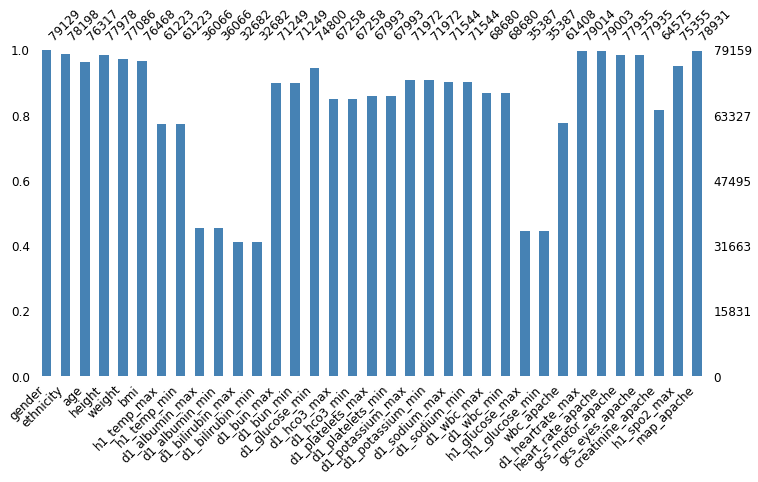

In [173]:
#Visual the missing Data
import missingno as msno
msno.bar(df[list_0], figsize=(12, 6), fontsize=12, color='steelblue')

### - Checkpoint Saved

In [404]:
df.to_csv(r"..\cmp 7023\Diabetes_df_stratied.csv".replace("\\","/"),index=False)


In [404]:
# df.to_csv(r"..\cmp 7023\Diabetes_df.csv".replace("\\","/"),index=False)


## 1.2 Outliers Data Fundamental

In [49]:
df2=pd.read_csv(r"..\cmp 7023\Diabetes_df.csv".replace("\\","/"))

In [27]:
# df2=pd.read_csv(r"..\cmp 7023\Diabetes_df_stratied.csv".replace("\\","/"))

In [28]:
df2a=df2[['age','height', 'weight', 'bmi', 'd1_bilirubin_max', 'd1_bilirubin_min', 
     'd1_bun_max','d1_bun_min', 'd1_glucose_min', 
    'd1_platelets_max', 'd1_platelets_min', 'd1_potassium_max',
       'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max',
    'd1_wbc_min', 'h1_glucose_max', 'h1_glucose_min', 'wbc_apache',
         'creatinine_apache','h1_spo2_max']]

In [29]:
X_non_bi=['age','height', 'weight', 'bmi', 'd1_bilirubin_max', 'd1_bilirubin_min', 
     'd1_bun_max','d1_bun_min', 'd1_glucose_min', 
    'd1_platelets_max', 'd1_platelets_min', 'd1_potassium_max',
       'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max',
    'd1_wbc_min', 'h1_glucose_max', 'h1_glucose_min', 'wbc_apache',
         'creatinine_apache','h1_spo2_max']

### - Define Features Data, Target Data and Numerical Data 

In [31]:
X_num=['age','elective_surgery', 'height', 'weight', 'bmi', 'readmission_status',
       'h1_temp_max', 'h1_temp_min', 'd1_albumin_max',
       'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_bun_max',
       'd1_bun_min', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min',
       'd1_platelets_max', 'd1_platelets_min', 'd1_potassium_max',
       'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max',
       'd1_wbc_min', 'h1_glucose_max', 'h1_glucose_min', 'wbc_apache',
       'intubated_apache', 'd1_heartrate_max', 'heart_rate_apache',
       'gcs_motor_apache', 'gcs_eyes_apache', 'creatinine_apache',
       'h1_spo2_max', 'map_apache', 'aids', 'cirrhosis', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'ventilated_apache','diabetes_mellitus']

In [32]:
total_cells = np.product(df2.shape)
total_missing = df2.isnull().sum().sum()
print(f'Total Cells: {total_cells}')
# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(f'Total Missing: {total_missing}')
print(f'Percent Missing: {round(percent_missing,2)}%')

Total Cells: 3957950
Total Missing: 468325
Percent Missing: 11.83%


In [2]:
def makeBoxplot(df,columns):
    plt.figure(figsize=(16,5))
    sns.boxplot(data=df[columns])
    plt.xticks(rotation=30)
    plt.show()
makeBoxplot(df2,X_non_bi)

NameError: name 'df2' is not defined

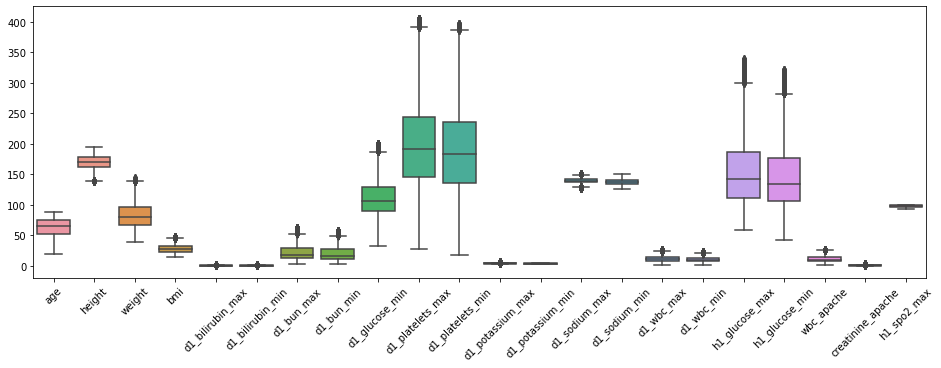

In [416]:
makeBoxplot(df2,X_non_bi)

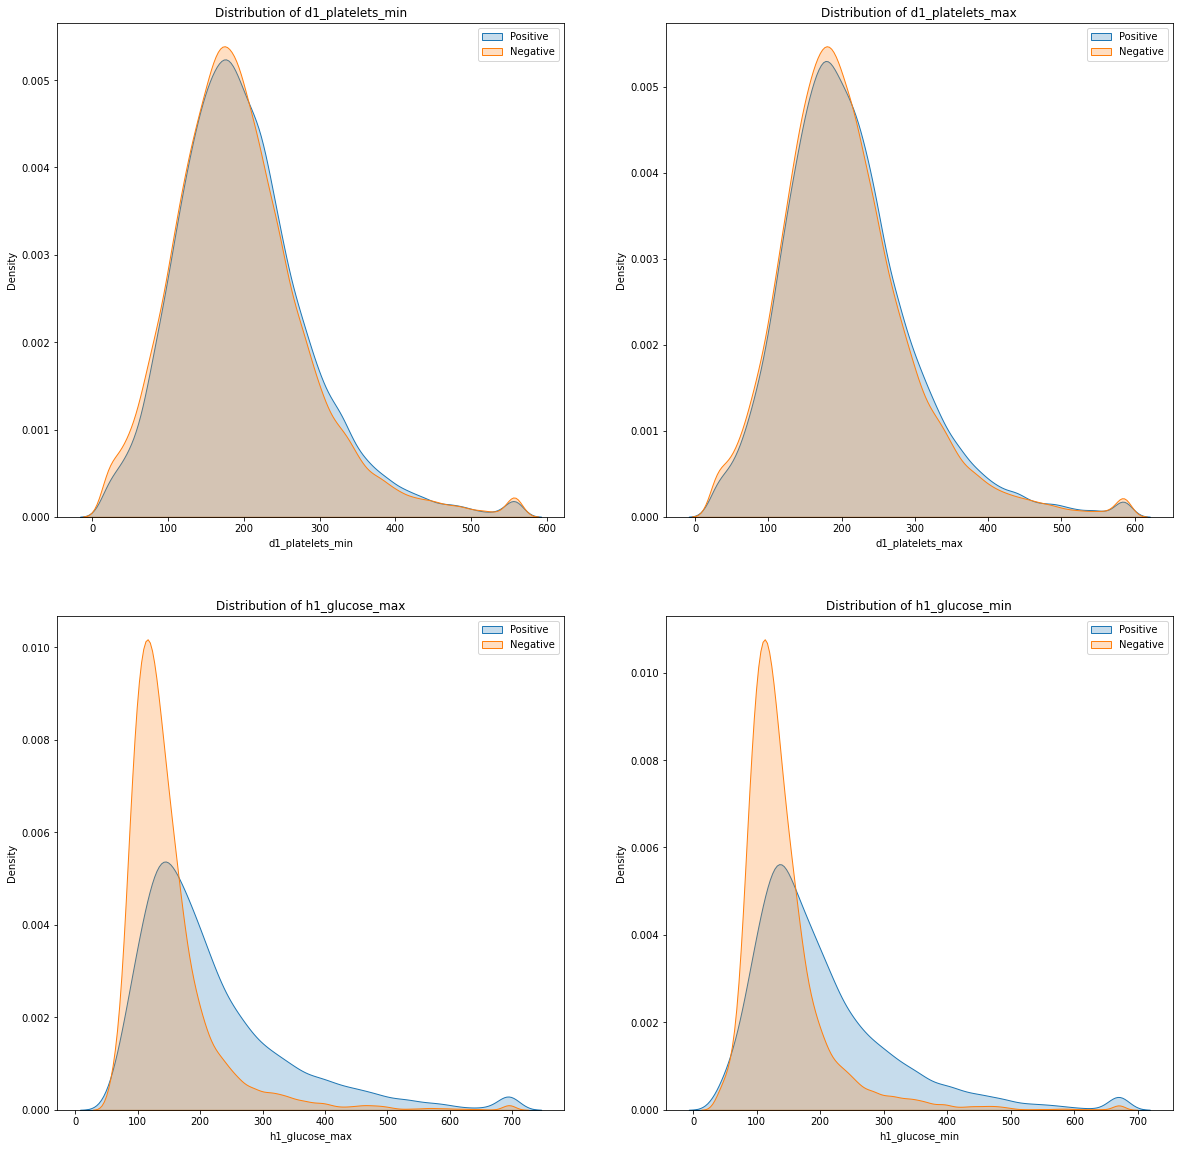

In [52]:
makeKdeplotPos(df_pos,df_neg,['d1_platelets_min', 'd1_platelets_max','h1_glucose_max', 'h1_glucose_min'])

In [39]:
def remove_outliers(df, columns):
    for i in columns:
        Q1 = df2[i].quantile(0.25)
        Q3 = df2[i].quantile(0.75)
        IQR = Q3 - Q1    #IQR is interquartile range.
        ls=list(df.index[(df[i] < Q1 - 1.5 * IQR) | (df[i] > Q3 + 1.5 *IQR)])
        df[i].loc[ls]=np.nan

In [413]:
remove_outliers(df2, X_non_bi)

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [414]:
total_missing = df2.isnull().sum().sum()
# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(f'Total Missing: {total_missing}')
print(f'Percent Missing: {round(percent_missing,2)}%')

Total Missing: 264636
Percent Missing: 13.37%


In [415]:
for i in range(missing_values_count2.shape[0]):
    percent=missing_values_count2.iloc[i,0]/diabetes_data.shape[0]
    if percent>0.6:
        drop_list.append(missing_values_count.index[i])
    elif percent>0:
        print(f"{missing_values_count.index[i].ljust(25)}---- {(percent*100).round(2)} %")

age                      ---- 4.43 %
height                   ---- 2.0 %
weight                   ---- 6.15 %
bmi                      ---- 8.12 %
h1_temp_max              ---- 22.64 %
h1_temp_min              ---- 22.64 %
d1_albumin_max           ---- 54.41 %
d1_albumin_min           ---- 54.41 %
d1_bun_max               ---- 20.86 %
d1_bun_min               ---- 20.34 %
d1_glucose_min           ---- 11.33 %
d1_hco3_max              ---- 15.01 %
d1_hco3_min              ---- 15.01 %
d1_inr_max               ---- 17.43 %
d1_inr_min               ---- 16.94 %
d1_lactate_max           ---- 13.72 %
d1_lactate_min           ---- 11.5 %
d1_platelets_max         ---- 14.21 %
d1_platelets_min         ---- 12.15 %
d1_potassium_max         ---- 18.16 %
d1_potassium_min         ---- 18.23 %
d1_wbc_max               ---- 26.26 %
h1_albumin_max           ---- 0.17 %
h1_albumin_min           ---- 0.19 %
h1_bilirubin_max         ---- 1.53 %
h1_bilirubin_min         ---- 1.53 %
h1_bun_max            

In [51]:
df_pos=df2.loc[(df2.diabetes_mellitus==1)]
df_neg=df2.loc[(df2.diabetes_mellitus==0)]

In [2]:
 # KDE plot 
def makeKdeplotPos(df1,df2,columns):
    plt.figure(figsize=(20,22))
    i=1
    for column in columns:
        #make sure that plot only takes the two plots below by using the following command
        # produce a plot for each incomelabel so they interlink
        col=4
        row=math.ceil((len(columns)/col))
        plt.subplot(row,col,i)
        sns.kdeplot(data=df1[column],label="Positive", shade=True)
        sns.kdeplot(data=df2[column], label="Negative",shade=True)
        #include a legend
        plt.legend()
        #include a dynamic title
        plt.title("Distribution of " +column)
        i+=1

In [78]:
len(X_num)

45

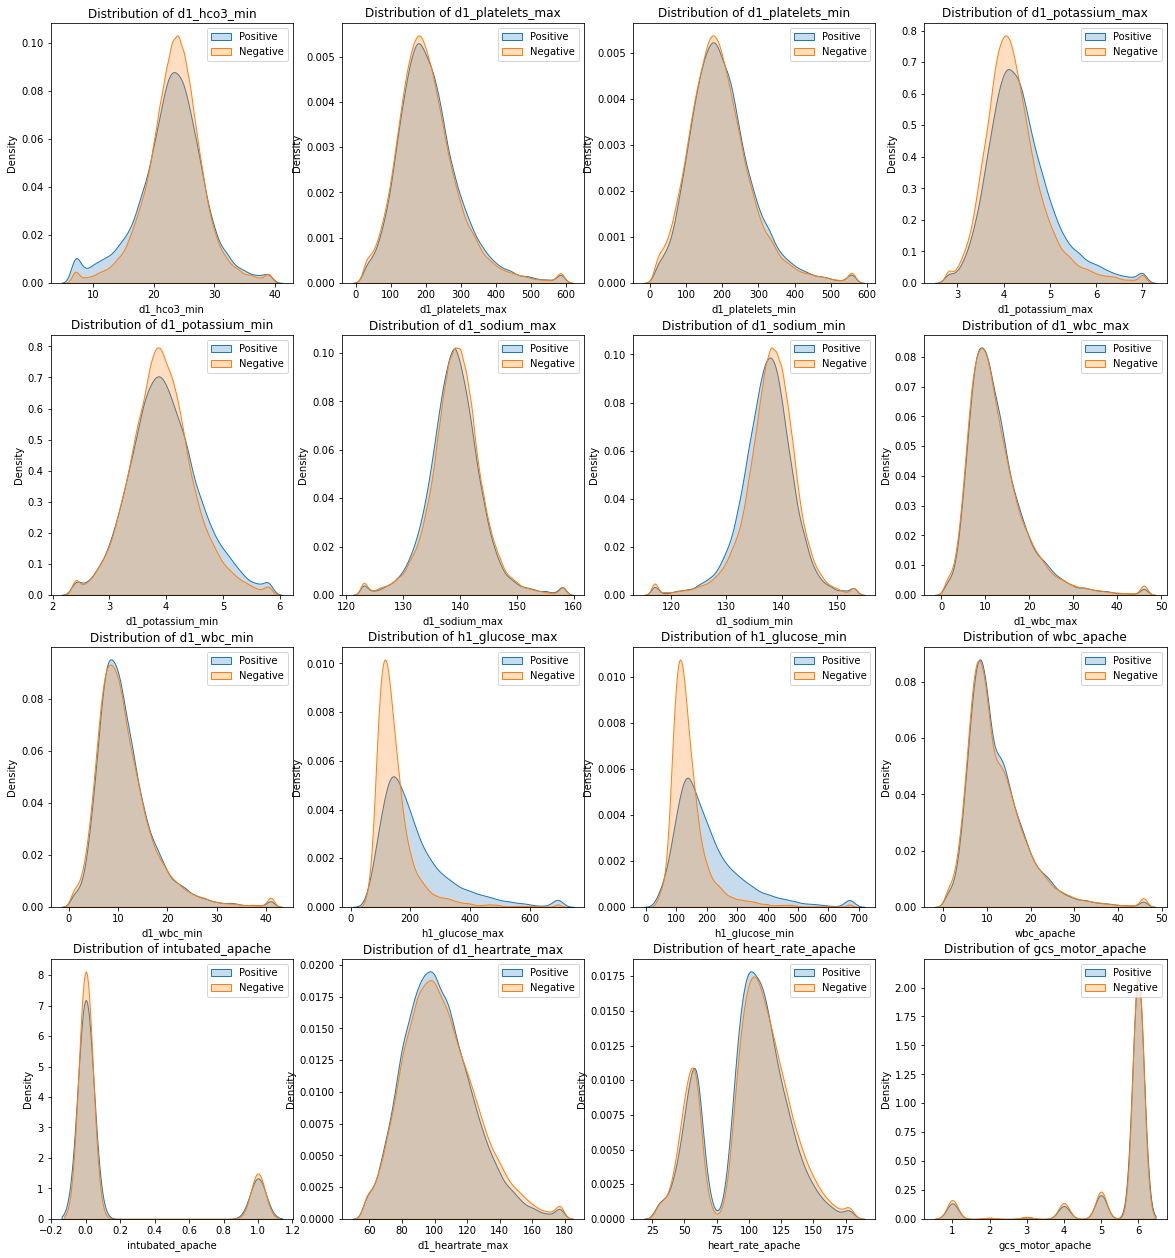

In [80]:
makeKdeplotPos(df_pos,df_neg,X_num[16:32])

### - Checkpoint Saved

In [420]:
# df2.to_csv(r"..\cmp 7023\df_outliers1.csv".replace("\\","/"),index=False)

In [89]:
df2.to_csv(r"..\cmp 7023\df_outliers1_.csv".replace("\\","/"),index=False)

## 1.3 Impute Missing Value

In [3]:
df3=pd.read_csv(r"..\cmp 7023\df_outliers1.csv".replace("\\","/"))
df3

encounter_id  hospital_id gender         ethnicity   age  \
0            214826          118      M         Caucasian  68.0   
1            276985          118      F         Caucasian  25.0   
2            262220          118      F         Caucasian  81.0   
3            201746           33      M         Caucasian   NaN   
4            246060           81      F         Caucasian  77.0   
5            182697           83      M         Caucasian  67.0   
6            195124           83      F         Caucasian  59.0   
7            239271          118      F         Caucasian  78.0   
8            195396          118      M         Caucasian  80.0   
9            265580          118      F         Caucasian   NaN   
10           190593           83      M         Caucasian  68.0   
11           238278          118      M         Caucasian  71.0   
12           152924           77      F         Caucasian  60.0   
13           203791          118      M         Caucasian  60.0   
14           264641           83      M         Caucasian  75.0   
15           195469           69      M         Caucasian  67.0   
16           233204           83      M         Caucasian  68.0   
17           151386          118      F         Caucasian  85.0   
18           149300          151      F         Caucasian  77.0   
19           167704           83      F         Caucasian  58.0   
20           176487          118      M         Caucasian  74.0   
21           231602          118      M         Caucasian  67.0   
22           172824           83      M         Caucasian  68.0   
23           252173          118      F         Caucasian  71.0   
24           223210           81      M         Caucasian  72.0   
...             ...          ...    ...               ...   ...   
79134        152891          176      F         Caucasian  66.0   
79135        174409          188      F         Caucasian  51.0   
79136        245263            1      F         Caucasian  50.0   
79137        270552          185      M         Caucasian  53.0   
79138        208495           61      F         Caucasian  57.0   
79139        233719          111      F         Caucasian  21.0   
79140        175442          185      F         Caucasian  81.0   
79141        184939          157      M         Caucasian  55.0   
79142        189633          157      F         Caucasian  71.0   
79143        258381          101      M             Asian  31.0   
79144        222877          153      M         Caucasian  84.0   
79145        192999          123      M          Hispanic  57.0   
79146        266519          183      M         Caucasian   NaN   
79147        185524          174      M         Caucasian  42.0   
79148        161527           17      F         Caucasian  71.0   
79149        199542          203      F         Caucasian  85.0   
79150        273341          186      M         Caucasian  25.0   
79151        271917          110      M         Caucasian  75.0   
79152        237214          128      M         Caucasian  77.0   
79153        155212          164      F         Caucasian   NaN   
79154        166024          146      F         Caucasian  86.0   
79155        185015          154      F         Caucasian  55.0   
79156        173688           47      M  African American  61.0   
79157        169835          120      M         Caucasian  80.0   
79158        209541           55      M         Caucasian  88.0   

       elective_surgery  height  weight        bmi  readmission_status  \
0                     0   180.3   73.90  22.732803                   0   
1                     0   172.7   95.30  31.952749                   0   
2                     1   165.1   61.70  22.635548                   0   
3                     0   188.0     NaN        NaN                   0   
4                     0   160.0   70.20  27.421875                   0   
5                     0   190.5  100.00  27.555611                   0   
6   

In [423]:
missing_values_count2 = pd.DataFrame(df3.isna().sum())

for i in range(df3.shape[1]):
    percent=missing_values_count2.iloc[i,0]/df3.shape[0]
    if percent>0:
        print(f"{missing_values_count2.index[i].ljust(25)}---- {(percent*100).round(2)}%")

gender                   ---- 0.04%
ethnicity                ---- 1.21%
age                      ---- 4.46%
height                   ---- 2.01%
weight                   ---- 6.16%
bmi                      ---- 8.14%
h1_temp_max              ---- 22.66%
h1_temp_min              ---- 22.66%
d1_albumin_max           ---- 54.44%
d1_albumin_min           ---- 54.44%
d1_bilirubin_max         ---- 64.19%
d1_bilirubin_min         ---- 64.63%
d1_bun_max               ---- 20.88%
d1_bun_min               ---- 20.36%
d1_glucose_min           ---- 11.35%
d1_hco3_max              ---- 15.03%
d1_hco3_min              ---- 15.03%
d1_platelets_max         ---- 17.45%
d1_platelets_min         ---- 16.96%
d1_potassium_max         ---- 13.74%
d1_potassium_min         ---- 11.52%
d1_sodium_max            ---- 14.24%
d1_sodium_min            ---- 12.17%
d1_wbc_max               ---- 18.18%
d1_wbc_min               ---- 18.25%
h1_glucose_max           ---- 60.46%
h1_glucose_min           ---- 60.42%
wbc_apa

In [432]:
df3a=df3.dropna()

### - Define Features Data, Target Data and Numerical Data 

### 1.3a Impute the Missing in Categorical Data

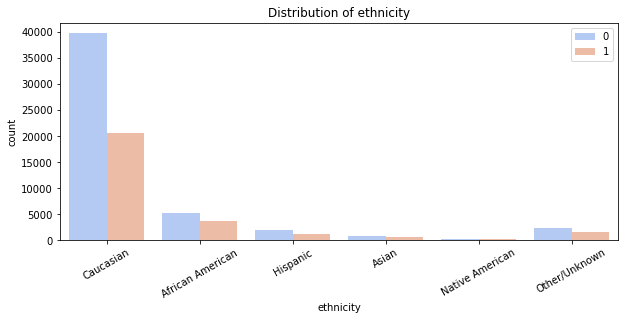

In [83]:
def DistPlot(df,hue,column):
    """ Make distribution plots of df for a defined column using hue"""
    plt.figure(figsize=(10,4))
    plt.xticks(rotation=30) 
    # produce a plot f
    sns.countplot(x=column, hue=hue,palette="coolwarm", data=df)
    #include a dynamic title
    plt.title("Distribution of " +column)
     #include a legend
    plt.legend()
    return
DistPlot(df3,'diabetes_mellitus','ethnicity')

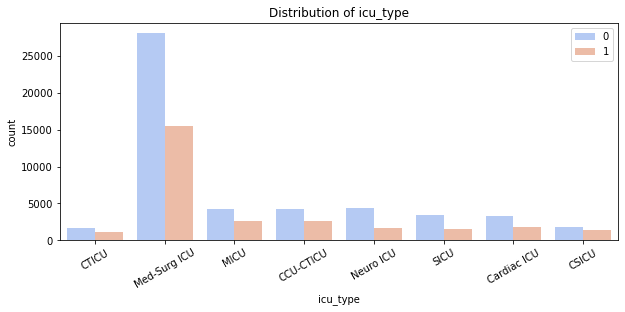

In [84]:
DistPlot(df3,'diabetes_mellitus','icu_type')

In [52]:
df3.dropna(subset=['gender'],inplace=True)

In [4]:
df3['ethnicity'].value_counts()

Caucasian           60374
African American     8798
Other/Unknown        3905
Hispanic             3138
Asian                1358
Native American       611
Name: ethnicity, dtype: int64

In [53]:
df3['ethnicity'].fillna(value='Other/Unknown',inplace=True)

In [56]:
df3.isnull().sum()

encounter_id                       0
hospital_id                        0
gender                             0
ethnicity                          0
age                             3505
elective_surgery                   0
height                          1582
weight                          4870
bmi                             6429
readmission_status                 0
icu_type                           0
h1_temp_max                    17921
h1_temp_min                    17921
d1_albumin_max                 43069
d1_albumin_min                 43069
d1_bilirubin_max               50788
d1_bilirubin_min               51136
d1_bun_max                     16515
d1_bun_min                     16098
d1_glucose_min                  8969
d1_hco3_max                    11883
d1_hco3_min                    11883
d1_platelets_max               13794
d1_platelets_min               13408
d1_potassium_max               10859
d1_potassium_min                9102
d1_sodium_max                  11250
d

In [5]:
df3a=df3.dropna()

df3a.to_csv(r"..\cmp 7023\Diabetes_df_impute1.csv".replace("\\","/"),index=False)

In [57]:
df3.to_csv(r"..\cmp 7023\Diabetes_df_impute1.csv".replace("\\","/"),index=False)

In [51]:
df3=pd.read_csv(r"..\cmp 7023\Diabetes_df_impute1.csv".replace("\\","/"))

encounter_id  hospital_id gender         ethnicity   age  \
0            214826          118      M         Caucasian  68.0   
1            276985          118      F         Caucasian  25.0   
2            262220          118      F         Caucasian  81.0   
3            201746           33      M         Caucasian   NaN   
4            246060           81      F         Caucasian  77.0   
5            182697           83      M         Caucasian  67.0   
6            195124           83      F         Caucasian  59.0   
7            239271          118      F         Caucasian  78.0   
8            195396          118      M         Caucasian  80.0   
9            265580          118      F         Caucasian   NaN   
10           190593           83      M         Caucasian  68.0   
11           238278          118      M         Caucasian  71.0   
12           152924           77      F         Caucasian  60.0   
13           203791          118      M         Caucasian  60.0   
14           264641           83      M         Caucasian  75.0   
15           195469           69      M         Caucasian  67.0   
16           233204           83      M         Caucasian  68.0   
17           151386          118      F         Caucasian  85.0   
18           149300          151      F         Caucasian  77.0   
19           167704           83      F         Caucasian  58.0   
20           176487          118      M         Caucasian  74.0   
21           231602          118      M         Caucasian  67.0   
22           172824           83      M         Caucasian  68.0   
23           252173          118      F         Caucasian  71.0   
24           223210           81      M         Caucasian  72.0   
...             ...          ...    ...               ...   ...   
79104        152891          176      F         Caucasian  66.0   
79105        174409          188      F         Caucasian  51.0   
79106        245263            1      F         Caucasian  50.0   
79107        270552          185      M         Caucasian  53.0   
79108        208495           61      F         Caucasian  57.0   
79109        233719          111      F         Caucasian  21.0   
79110        175442          185      F         Caucasian  81.0   
79111        184939          157      M         Caucasian  55.0   
79112        189633          157      F         Caucasian  71.0   
79113        258381          101      M             Asian  31.0   
79114        222877          153      M         Caucasian  84.0   
79115        192999          123      M          Hispanic  57.0   
79116        266519          183      M         Caucasian   NaN   
79117        185524          174      M         Caucasian  42.0   
79118        161527           17      F         Caucasian  71.0   
79119        199542          203      F         Caucasian  85.0   
79120        273341          186      M         Caucasian  25.0   
79121        271917          110      M         Caucasian  75.0   
79122        237214          128      M         Caucasian  77.0   
79123        155212          164      F         Caucasian   NaN   
79124        166024          146      F         Caucasian  86.0   
79125        185015          154      F         Caucasian  55.0   
79126        173688           47      M  African American  61.0   
79127        169835          120      M         Caucasian  80.0   
79128        209541           55      M         Caucasian  88.0   

       elective_surgery  height  weight        bmi  readmission_status  \
0                     0   180.3   73.90  22.732803                   0   
1                     0   172.7   95.30  31.952749                   0   
2                     1   165.1   61.70  22.635548                   0   
3                     0   188.0     NaN        NaN                   0   
4                     0   160.0   70.20  27.421875                   0   
5                     0   190.5  100.00  27.555611                   0   
6   

In [44]:
df4b=df4b.loc[df4b.age.dropna().index,:]

In [23]:
df4b.to_csv(r"..\cmp 7023\DF_NEW.csv".replace("\\","/"),index=False)

In [31]:
df4b.columns

Index(['gender', 'age', 'elective_surgery', 'height', 'weight', 'bmi',
       'd1_glucose_min', 'wbc_apache', 'intubated_apache', 'd1_heartrate_max',
       'heart_rate_apache', 'gcs_motor_apache', 'gcs_eyes_apache',
       'creatinine_apache', 'h1_spo2_max', 'map_apache', 'aids', 'cirrhosis',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'ventilated_apache',
       'd1_albumin_max_missing', 'd1_albumin_min_missing',
       'd1_bilirubin_max_missing', 'd1_bilirubin_min_missing',
       'h1_glucose_max_missing', 'h1_glucose_min_missing', 'ethnicity_code',
       'ICU_CCU-CTICU', 'ICU_CSICU', 'ICU_CTICU', 'ICU_Cardiac ICU',
       'ICU_MICU', 'ICU_Med-Surg ICU', 'ICU_Neuro ICU', 'ICU_SICU',
       'h1_temp_avg', 'd1_albumin_avg', 'd1_platelets_avg', 'd1_bilirubin_avg',
       'd1_bun_avg', 'd1_hco3_avg', 'd1_potassium_avg', 'd1_sodium_avg',
       'd1_wbc_avg', 'h1_glucose_avg'],
      dtype='object')

In [30]:
df4b=pd.read_csv(r"..\cmp 7023\DF_NEW.csv".replace("\\","/"))

In [51]:
X_num=['gender', 'age', 'elective_surgery', 'height', 'weight', 'bmi',
       'd1_glucose_min', 'h1_glucose_max', 'h1_glucose_min', 'wbc_apache',
       'intubated_apache', 'd1_heartrate_max', 'heart_rate_apache',
       'gcs_motor_apache', 'gcs_eyes_apache', 'creatinine_apache',
       'h1_spo2_max', 'map_apache', 'aids', 'cirrhosis', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'ventilated_apache',
       'd1_albumin_max_missing', 'd1_albumin_min_missing',
       'd1_bilirubin_max_missing', 'd1_bilirubin_min_missing',
       'h1_glucose_max_missing', 'h1_glucose_min_missing', 'ethnicity_code',
       'ICU_CCU-CTICU', 'ICU_CSICU', 'ICU_CTICU', 'ICU_Cardiac ICU',
       'ICU_MICU', 'ICU_Med-Surg ICU', 'ICU_Neuro ICU', 'ICU_SICU',
       'h1_temp_avg', 'd1_albumin_avg', 'd1_platelets_avg', 'd1_bilirubin_avg',
       'd1_bun_avg', 'd1_hco3_avg', 'd1_potassium_avg', 'd1_sodium_avg',
       'd1_wbc_avg']

### 1.3b Impute the Missing in Numerical Data

In [43]:
df3=pd.read_csv(r"..\cmp 7023\Diabetes_df_impute1.csv".replace("\\","/"))

In [11]:
df3.drop(columns='diabetes_mellitus',inplace=True)

KeyError: "['diabetes_mellitus'] not found in axis"

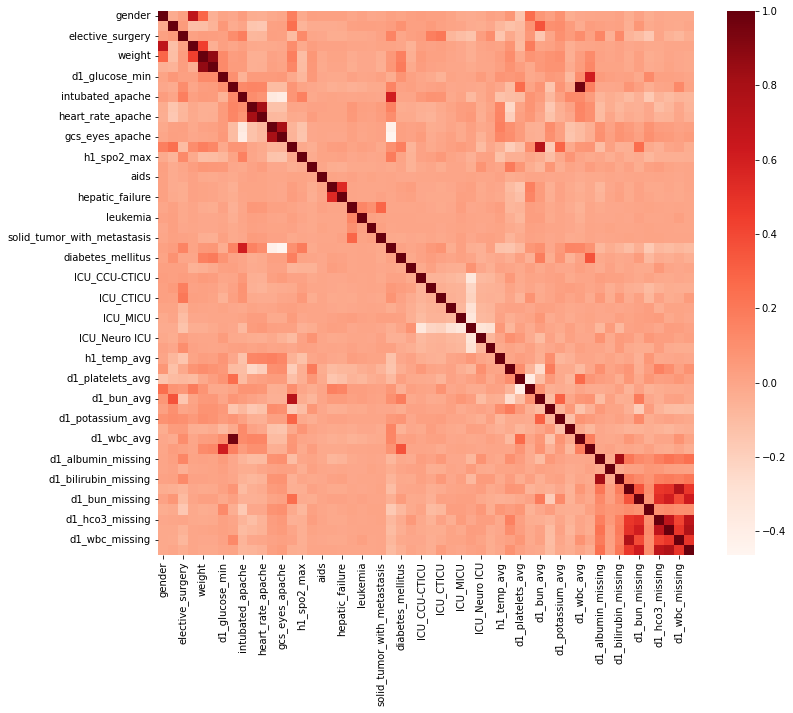

In [96]:
corr=df4b.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)
plt.show()

In [8]:
df_pos=df3.loc[(df3.diabetes_mellitus==1)]
df_neg=df3.loc[(df3.diabetes_mellitus==0)]

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

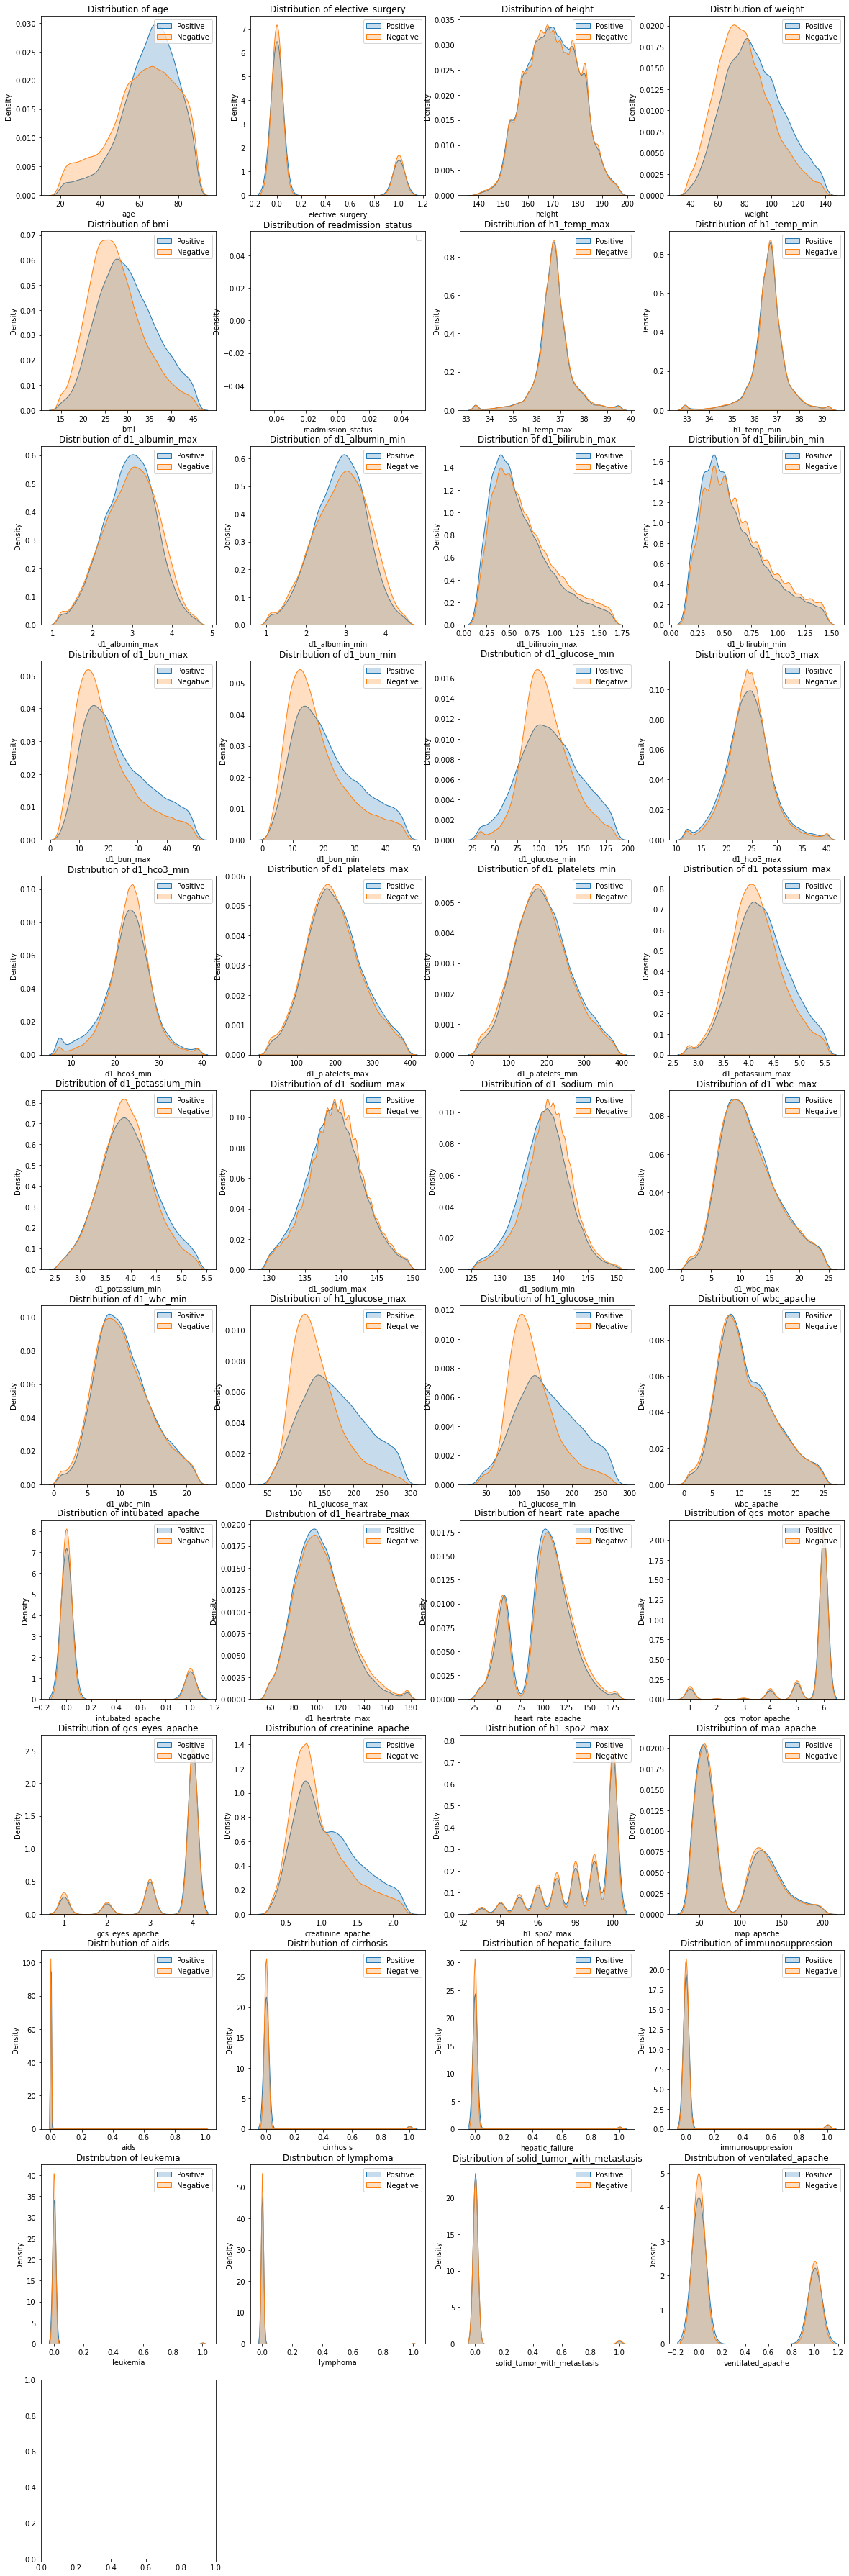

In [306]:
makeKdeplotPos(df_pos,df_neg,X_num)

In [9]:
df3a=df3[['d1_albumin_max','d1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min','h1_glucose_max', 'h1_glucose_min']]
df3a

d1_albumin_max  d1_albumin_min  d1_bilirubin_max  d1_bilirubin_min  \
0                 2.3             2.3               0.4               0.4   
1                 NaN             NaN               NaN               NaN   
2                 NaN             NaN               NaN               NaN   
3                 NaN             NaN               NaN               NaN   
4                 1.6             1.6               0.5               0.5   
5                 NaN             NaN               NaN               NaN   
6                 NaN             NaN               NaN               NaN   
7                 NaN             NaN               NaN               NaN   
8                 NaN             NaN               NaN               NaN   
9                 3.1             3.0               0.8               0.6   
10                NaN             NaN               NaN               NaN   
11                NaN             NaN               NaN               NaN   
12                1.6             1.5               1.3               0.5   
13                NaN             NaN               NaN               NaN   
14                NaN             NaN               NaN               NaN   
15                2.3             2.3               0.5               0.5   
16                NaN             NaN               NaN               NaN   
17                2.4             2.4               0.5               0.5   
18                1.5             1.5               0.5               0.5   
19                NaN             NaN               NaN               NaN   
20                3.0             2.8               NaN               NaN   
21                NaN             NaN               NaN               NaN   
22                NaN             NaN               NaN               NaN   
23                2.6             2.6               0.3               0.3   
24                NaN             NaN               NaN               NaN   
...               ...             ...               ...               ...   
79104             NaN             NaN               NaN               NaN   
79105             NaN             NaN               NaN               NaN   
79106             NaN             NaN               NaN               NaN   
79107             NaN             NaN               NaN               NaN   
79108             3.5             3.5               1.0               1.0   
79109             NaN             NaN               NaN               NaN   
79110             NaN             NaN               NaN               NaN   
79111             3.3             3.3               0.6               0.6   
79112             3.4             3.2               NaN               NaN   
79113             2.6             2.3               NaN               NaN   
79114             NaN             NaN               NaN               NaN   
79115             3.7             3.7               0.8               0.8   
79116             NaN             NaN               NaN               NaN   
79117             NaN             NaN               NaN               NaN   
79118             2.7             2.7               0.5               0.5   
79119             NaN             NaN               NaN               NaN   
79120             NaN             NaN               NaN               NaN   
79121             NaN             NaN               NaN               NaN   
79122             2.9             2.9               0.7               0.7   
79123             NaN             NaN               NaN               NaN   
79124             NaN             NaN               NaN               NaN   
79125             NaN             NaN               NaN               NaN   
79126             2.6             2.6               0.4               0.4   
79127             2.0             2.0               0.2               0.2   
79128             3.0             3.0               0.7               0.7   

  

In [10]:
for i in ['d1_albumin_max','d1_albumin_min',
          'd1_bilirubin_max', 'd1_bilirubin_min',
          'h1_glucose_max', 'h1_glucose_min']:
    df3a[i].where(df3a[i].isna()==True,0,inplace=True)
    df3a[i].where(df3a[i].isna()==False,1,inplace=True)

df3a.columns=['d1_albumin_max_missing','d1_albumin_min_missing',
          'd1_bilirubin_max_missing', 'd1_bilirubin_min_missing',
          'h1_glucose_max_missing', 'h1_glucose_min_missing']
df3a

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


d1_albumin_max_missing  d1_albumin_min_missing  \
0                         0.0                     0.0   
1                         1.0                     1.0   
2                         1.0                     1.0   
3                         1.0                     1.0   
4                         0.0                     0.0   
5                         1.0                     1.0   
6                         1.0                     1.0   
7                         1.0                     1.0   
8                         1.0                     1.0   
9                         0.0                     0.0   
10                        1.0                     1.0   
11                        1.0                     1.0   
12                        0.0                     0.0   
13                        1.0                     1.0   
14                        1.0                     1.0   
15                        0.0                     0.0   
16                        1.0                     1.0   
17                        0.0                     0.0   
18                        0.0                     0.0   
19                        1.0                     1.0   
20                        0.0                     0.0   
21                        1.0                     1.0   
22                        1.0                     1.0   
23                        0.0                     0.0   
24                        1.0                     1.0   
...                       ...                     ...   
79104                     1.0                     1.0   
79105                     1.0                     1.0   
79106                     1.0                     1.0   
79107                     1.0                     1.0   
79108                     0.0                     0.0   
79109                     1.0                     1.0   
79110                     1.0                     1.0   
79111                     0.0                     0.0   
79112                     0.0                     0.0   
79113                     0.0                     0.0   
79114                     1.0                     1.0   
79115                     0.0                     0.0   
79116                     1.0                     1.0   
79117                     1.0                     1.0   
79118                     0.0                     0.0   
79119                     1.0                     1.0   
79120                     1.0                     1.0   
79121                     1.0                     1.0   
79122                     0.0                     0.0   
79123                     1.0                     1.0   
79124                     1.0                     1.0   
79125                     1.0                     1.0   
79126                     0.0                     0.0   
79127                     0.0                     0.0   
79128                     0.0                     0.0   

       d1_bilirubin_max_missing  d1_bilirubin_min_missing  \
0                           0.0                       0.0   
1                           1.0                       1.0   
2                           1.0                       1.0   
3                           1.0                       1.0   
4                           0.0                       0.0   
5                           1.0                       1.0   
6                           1.0                       1.0   
7                           1.0                       1.0   
8                           1.0                       1.0   
9                           0.0                       0.0   
10                          1.0                       1.0   
11                          1.0                       1.0   
12                          0.0                       0.0   
13                          1.0                       1.0   
14                          1.0                       1.0   
15                          0.0                       0.0   
16   

In [11]:
df3b=pd.concat([df3,df3a],axis=1)
df3b.columns

Index(['encounter_id', 'hospital_id', 'gender', 'ethnicity', 'age',
       'elective_surgery', 'height', 'weight', 'bmi', 'readmission_status',
       'icu_type', 'h1_temp_max', 'h1_temp_min', 'd1_albumin_max',
       'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_bun_max',
       'd1_bun_min', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min',
       'd1_platelets_max', 'd1_platelets_min', 'd1_potassium_max',
       'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max',
       'd1_wbc_min', 'h1_glucose_max', 'h1_glucose_min', 'wbc_apache',
       'intubated_apache', 'd1_heartrate_max', 'heart_rate_apache',
       'gcs_motor_apache', 'gcs_eyes_apache', 'creatinine_apache',
       'h1_spo2_max', 'map_apache', 'aids', 'cirrhosis', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'ventilated_apache', 'diabetes_mellitus',
       'd1_albumin_max_missing', 'd1_albumin_min_missing',
       'd1_bilirubin_max_m

In [12]:
df3b.drop(columns='diabetes_mellitus',inplace=True)

In [86]:
missing_list=[]
for i in range(df4b.shape[1]):
    percent=df4b.isna().sum()[i]/df4b.shape[0]
    if percent>0:
        missing_list.append(df4b.isna().sum().index[i])

len(missing_list)

23

In [95]:
X_miss=['height', 'weight', 'bmi',
       'd1_glucose_min', 'h1_glucose_avg','wbc_apache',
       'd1_heartrate_max', 'heart_rate_apache',
       'gcs_motor_apache', 'gcs_eyes_apache', 'creatinine_apache',
       'h1_spo2_max', 'map_apache','h1_temp_avg', 'd1_albumin_avg', 'd1_platelets_avg', 'd1_bilirubin_avg',
       'd1_bun_avg', 'd1_hco3_avg', 'd1_potassium_avg', 'd1_sodium_avg',
       'd1_wbc_avg']

In [97]:
X_num=['gender', 'age', 'elective_surgery', 'height', 'weight', 'bmi',
       'd1_glucose_min', 'wbc_apache', 'intubated_apache', 'd1_heartrate_max',
       'heart_rate_apache', 'gcs_motor_apache', 'gcs_eyes_apache',
       'creatinine_apache', 'h1_spo2_max', 'map_apache', 'aids', 'cirrhosis',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'ventilated_apache',
       'd1_albumin_max_missing', 'd1_albumin_min_missing',
       'd1_bilirubin_max_missing', 'd1_bilirubin_min_missing',
       'h1_glucose_max_missing', 'h1_glucose_min_missing', 'ethnicity_code',
       'ICU_CCU-CTICU', 'ICU_CSICU', 'ICU_CTICU', 'ICU_Cardiac ICU',
       'ICU_MICU', 'ICU_Med-Surg ICU', 'ICU_Neuro ICU', 'ICU_SICU',
       'h1_temp_avg', 'd1_albumin_avg', 'd1_platelets_avg', 'd1_bilirubin_avg',
       'd1_bun_avg', 'd1_hco3_avg', 'd1_potassium_avg', 'd1_sodium_avg',
       'd1_wbc_avg', 'h1_glucose_avg']

In [262]:
df3['diabetes_mellitus']=df3['diabetes_mellitus'].astype('category')
df3['gender']=df3['gender'].astype('category')
df3['ethnicity']=df3['ethnicity'].astype('category')
df3['icu_type']=df3['icu_type'].astype('category')

df3.info()
df3.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79129 entries, 0 to 79128
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   encounter_id                 79129 non-null  int64   
 1   hospital_id                  79129 non-null  int64   
 2   gender                       79129 non-null  category
 3   ethnicity                    79129 non-null  category
 4   age                          75624 non-null  float64 
 5   elective_surgery             79129 non-null  int64   
 6   height                       77547 non-null  float64 
 7   weight                       74259 non-null  float64 
 8   bmi                          72700 non-null  float64 
 9   readmission_status           79129 non-null  int64   
 10  icu_type                     79129 non-null  category
 11  h1_temp_max                  61208 non-null  float64 
 12  h1_temp_min                  61208 non-null  float64 
 13  d

(79129, 50)

In [83]:
#running Multiple Imputation by Chained Equation
import miceforest as mf
kds = mf.ImputationKernel(df4b,
                          datasets=5,
                          save_all_iterations=True,
                          random_state=1)
#diabetes_amp=mf.ampute_data(df_temp[X_num],perc=0.25,random_state=199)
kds.mice(3)

In [84]:
kds.complete_data(1)
df3a=pd.concat([kds.complete_data(i) for i in range(5)]).groupby(level=0).mean()

In [70]:
df3a.describe()

gender          age  elective_surgery        height  \
count  75624.000000  75624.00000      75624.000000  75624.000000   
mean       0.548159     62.85892          0.193259    169.884992   
std        0.497679     15.95551          0.394857     10.582029   
min        0.000000     20.00000          0.000000    139.700000   
25%        0.000000     53.00000          0.000000    162.600000   
50%        1.000000     65.00000          0.000000    170.100000   
75%        1.000000     75.00000          0.000000    177.800000   
max        1.000000     89.00000          1.000000    195.590000   

             weight           bmi  d1_glucose_min  h1_glucose_max  \
count  75624.000000  75624.000000    75624.000000    75624.000000   
mean      83.533186     28.845680      109.929123      226.175235   
std       21.089158      6.565909       28.264487       70.724341   
min       38.600000     14.844926       33.000000       59.000000   
25%       68.040000     24.147140       91.200000      157.000000   
50%       81.600000     28.076839      108.000000      276.400000   
75%       97.085000     32.787749      127.000000      279.200000   
max      139.500000     45.588154      185.000000      286.000000   

       h1_glucose_min    wbc_apache  intubated_apache  d1_heartrate_max  \
count    75624.000000  75624.000000      75624.000000      75624.000000   
mean       203.774371     11.182051          0.159288        103.244338   
std         60.174767      4.759486          0.365947         21.876089   
min         42.000000      0.900000          0.000000         58.000000   
25%        149.000000      7.800000          0.000000         88.000000   
50%        237.000000     10.400000          0.000000        101.000000   
75%        250.400000     14.000000          0.000000        117.000000   
max        271.000000     25.140000          1.000000        177.000000   

       heart_rate_apache  gcs_motor_apache  gcs_eyes_apache  \
count       75624.000000      75624.000000     75624.000000   
mean           99.842021          5.491804         3.492005   
std            30.512609          1.257257         0.929872   
min            30.000000          1.000000         1.000000   
25%            87.000000          6.000000         3.000000   
50%           104.000000          6.000000         4.000000   
75%           120.000000          6.000000         4.000000   
max           178.000000          6.000000         4.000000   

       creatinine_apache   h1_spo2_max    map_apache          aids  \
count       75624.000000  75624.000000  75624.000000  75624.000000   
mean            1.046865     98.407960     87.501216      0.000873   
std             0.395308      1.826766     42.000947      0.029529   
min             0.300000     93.000000     40.000000      0.000000   
25%             0.740000     97.000000     54.000000      0.000000   
50%             0.972000     99.000000     66.000000      0.000000   
75%             1.306000    100.000000    124.000000      0.000000   
max             2.150000    100.000000    200.000000      1.000000   

          cirrhosis  hepatic_failure  immunosuppression      leukemia  \
count  75624.000000     75624.000000       75624.000000  75624.000000   
mean       0.017428         0.014228           0.026301      0.007471   
std        0.130862         0.118432           0.160031      0.086113   
min        0.000000         0.000000           0.000000      0.000000   
25%        0.000000         0.000000           0.000000      0.000000   
50%        0.000000         0.000000           0.000000      0.000000   
75%        0.000000         0.000000           0.000000      0.000000   
max        1.000000         1.000000           1.000000      1.000000   

           lymphoma  solid_tumor_with_metastasis  ventilated_apache  \
count  75624.000000                 75624.000000       75624.000000   
mean       0.004112                     0.021409           0.336666   
std        0.063997             

In [260]:
df3.describe()

encounter_id   hospital_id          age  elective_surgery  \
count   79129.000000  79129.000000  75624.00000      79129.000000   
mean   212869.572432    106.188250     62.85892          0.189475   
std     38114.536773     63.777624     15.95551          0.391888   
min    147001.000000      1.000000     20.00000          0.000000   
25%    179773.000000     49.000000     53.00000          0.000000   
50%    212872.000000    112.000000     65.00000          0.000000   
75%    245818.000000    165.000000     75.00000          0.000000   
max    278997.000000    204.000000     89.00000          1.000000   

             height        weight           bmi  readmission_status  \
count  77547.000000  74259.000000  72700.000000             79129.0   
mean     169.737032     82.268166     28.342905                 0.0   
std       10.604082     20.993869      6.386820                 0.0   
min      139.700000     38.600000     14.844926                 0.0   
25%      162.560000     67.000000     23.673925                 0.0   
50%      170.000000     80.290000     27.586109                 0.0   
75%      177.800000     96.000000     32.404242                 0.0   
max      195.590000    139.500000     45.588154                 0.0   

        h1_temp_max   h1_temp_min  d1_albumin_max  d1_albumin_min  \
count  61208.000000  61208.000000    36060.000000    36060.000000   
mean      36.721429     36.613067        2.946999        2.875964   
std        0.771539      0.795603        0.667944        0.672758   
min       33.400000     32.900000        1.200000        1.100000   
25%       36.400000     36.300000        2.500000        2.400000   
50%       36.700000     36.700000        3.000000        2.900000   
75%       37.100000     37.000000        3.400000        3.400000   
max       39.500000     39.300000        4.600000        4.500000   

       d1_bilirubin_max  d1_bilirubin_min    d1_bun_max    d1_bun_min  \
count      28341.000000      27993.000000  62614.000000  63031.000000   
mean           0.659658          0.612202     20.298459     18.850512   
std            0.341230          0.302210     10.583324      9.958851   
min            0.200000          0.200000      4.000000      3.000000   
25%            0.400000          0.400000     12.000000     11.000000   
50%            0.600000          0.500000     18.000000     16.000000   
75%            0.900000          0.800000     26.000000     25.000000   
max            1.640000          1.400000     49.500000     46.000000   

       d1_glucose_min   d1_hco3_max   d1_hco3_min  d1_platelets_max  \
count    70160.000000  67246.000000  67246.000000      65335.000000   
mean       109.143914     24.442483     23.106673        196.182414   
std         29.463071      4.403214      5.124591         72.658952   
min         33.000000     12.000000      7.000000         27.000000   
25%         90.000000     22.000000     20.000000        146.000000   
50%        106.000000     24.000000     23.000000        191.000000   
75%        128.000000     27.000000     26.000000        243.000000   
max        185.000000     40.000000     39.000000        388.000000   

       d1_platelets_min  d1_potassium_max  d1_potassium_min  d1_sodium_max  \
count      65721.000000      68270.000000      70027.000000   67879.000000   
mean         186.743419          4.176323          3.923350     139.182348   
std           73.659273          0.527869          0.530005       3.792542   
min           18.550000          2.800000          2.600000     130.000000   
25%          135.000000          3.800000          3.600000     137.000000   
50%          183.000000          4.100000          3.900000     139.000000   
75%          235.000000          4.500000          4.300000     142.000000   
max          384.000000          5.510000          5.300000     149.000000   

       d1_sodium_min    d1_wbc_max    d1_wbc_min  h1_glucose_max  \
count   69511.000000  64750.000000  64697.000000    312

In [164]:
df3a.isnull().sum().sum()

0

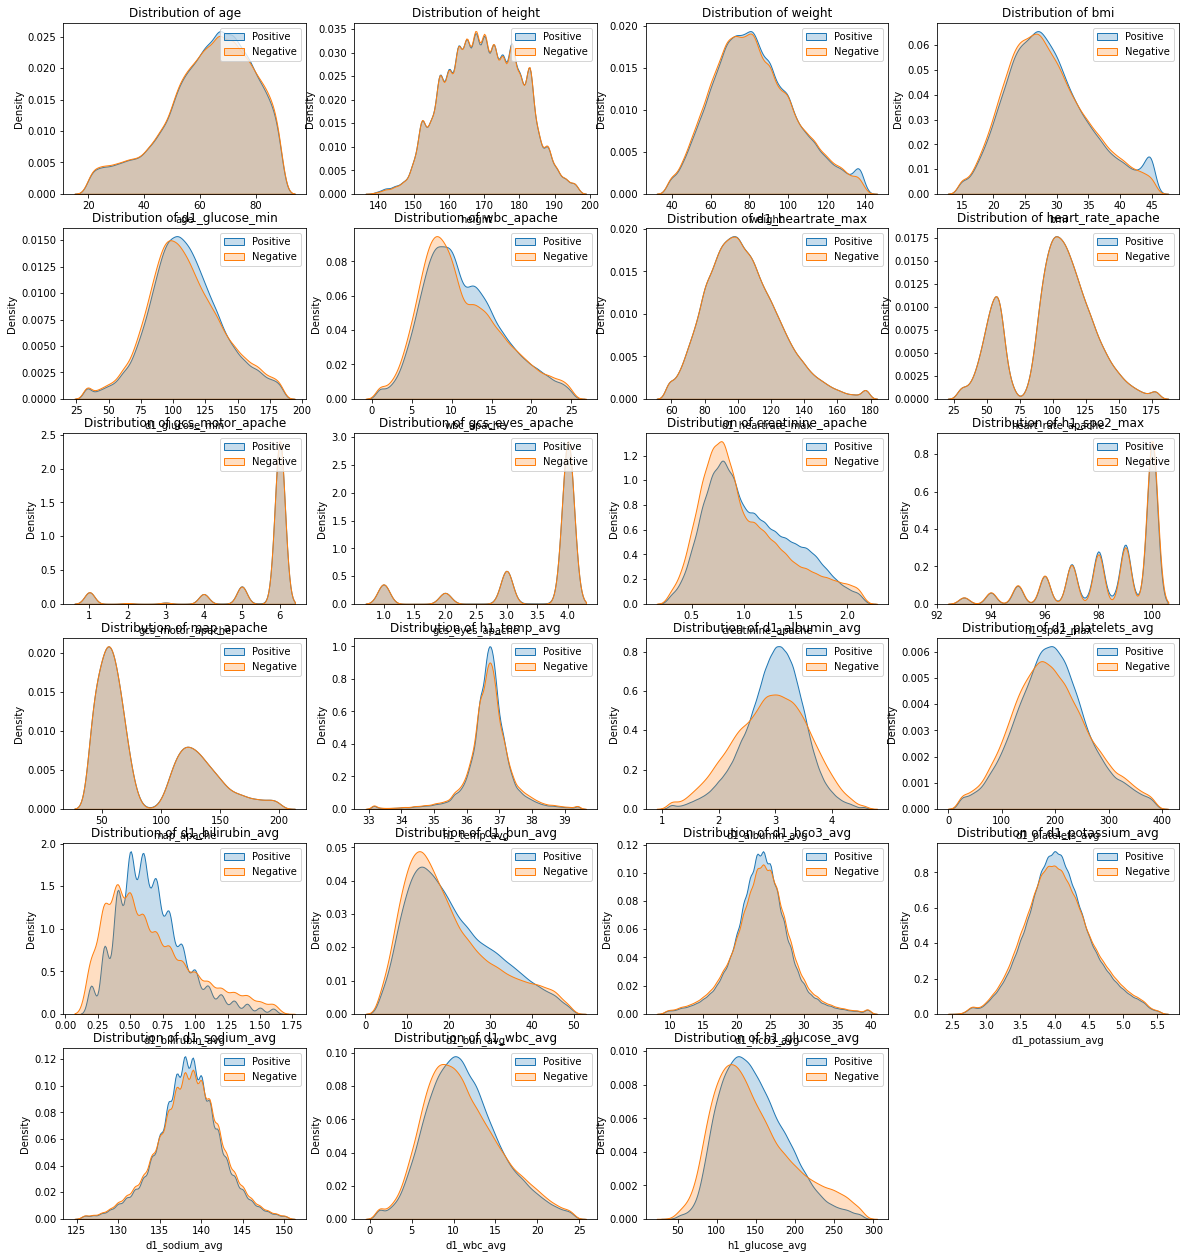

In [87]:
makeKdeplotPos(df3a,df4b,missing_list)

In [23]:
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
imputer = MissForest()


<frozen importlib._bootstrap>:219: RuntimeWarning: sklearn.tree._criterion.Criterion size changed, may indicate binary incompatibility. Expected 328 from C header, got 352 from PyObject


ValueError: sklearn.tree._criterion.ClassificationCriterion size changed, may indicate binary incompatibility. Expected 1168 from C header, got 368 from PyObject

In [82]:
df4b=pd.read_csv(r"..\cmp 7023\DF_NEW2.csv".replace("\\","/"))

In [88]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice_imputer = IterativeImputer(random_state=1) # default max_iter=10 for rounds of imputation
df3c = mice_imputer.fit_transform(df4b)
df3c = pd.DataFrame(df3c, columns=df4b.columns)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


gender        age  elective_surgery  height      weight        bmi  \
0         1.0  68.000000               0.0   180.3   73.900000  22.732803   
1         0.0  25.000000               0.0   172.7   95.300000  31.952749   
2         0.0  81.000000               1.0   165.1   61.700000  22.635548   
3         1.0  57.477924               0.0   188.0   97.657271  27.757409   
4         0.0  77.000000               0.0   160.0   70.200000  27.421875   
5         1.0  67.000000               0.0   190.5  100.000000  27.555611   
6         0.0  59.000000               0.0   165.1   82.903477  30.302091   
7         0.0  78.000000               0.0   160.0   77.734027  30.227085   
8         1.0  80.000000               0.0   170.2  103.300000  35.659989   
9         0.0  58.521889               1.0   160.0   77.480915  30.003664   
10        1.0  68.000000               1.0   172.7   82.200000  27.560503   
11        1.0  71.000000               0.0   177.8  121.700000  38.497016   
12        0.0  60.000000               0.0   165.1   79.640391  29.130523   
13        1.0  60.000000               1.0   170.2  102.700000  35.452865   
14        1.0  75.000000               1.0   182.9  112.000000  33.480398   
15        1.0  67.000000               0.0   177.8   90.700000  28.690874   
16        1.0  68.000000               0.0   172.7  102.900000  34.500922   
17        0.0  85.000000               0.0   149.9   79.700000  35.469499   
18        0.0  77.000000               1.0   165.1   88.000000  32.284088   
19        0.0  58.000000               0.0   165.1   81.666408  29.789057   
20        1.0  74.000000               0.0   167.6   71.100000  25.311715   
21        1.0  67.000000               0.0   170.2   96.600000  33.347096   
22        1.0  68.000000               0.0   182.9   86.800000  25.947308   
23        0.0  71.000000               0.0   160.0   89.800000  35.078125   
24        1.0  72.000000               0.0   170.2   72.500000  25.027582   
...       ...        ...               ...     ...         ...        ...   
79104     0.0  66.000000               0.0   152.4   70.300000  30.268116   
79105     0.0  51.000000               0.0   162.5   99.000000  37.491124   
79106     0.0  50.000000               0.0   165.1   95.300000  34.962200   
79107     1.0  53.000000               1.0   172.7   94.000000  31.516877   
79108     0.0  57.000000               0.0   175.0   94.500000  30.857143   
79109     0.0  21.000000               0.0   168.0   74.700000  26.466837   
79110     0.0  81.000000               0.0   157.5   78.200000  31.524313   
79111     1.0  55.000000               0.0   182.9   86.200000  25.767949   
79112     0.0  71.000000               0.0   165.1   59.000000  21.645014   
79113     1.0  31.000000               0.0   165.1  117.930000  43.264347   
79114     1.0  84.000000               0.0   167.6   47.000000  16.732076   
79115     1.0  57.000000               0.0   175.3   78.900000  25.675161   
79116     1.0  56.379627               0.0   173.0   80.920000  27.037322   
79117     1.0  42.000000               0.0   172.7  130.100000  43.620699   
79118     0.0  71.000000               0.0   165.0  107.400000  39.449036   
79119     0.0  85.000000               0.0   157.5   59.300000  23.905266   
79120     1.0  25.000000               1.0   177.8  102.100000  32.297003   
79121     1.0  75.000000               0.0   180.0  109.200000  33.703704   
79122     1.0  77.000000               0.0   172.0   92.900000  31.402109   
79123     0.0  81.202065               0.0   149.9   49.200000  21.895851   
79124     0.0  86.000000               0.0   167.6   86.200000  30.687339   
79125     0.0  55.000000               0.0   165.1   91.700000  33.641487   
79126     1.0  61.000000               0.0   173.0   88.100000  29.436333   
79127     1.0  80.000000               0.0   175.0   84.800000  27.689796   
79128     1.0  88.000000               0.0   170.1   90.900000  31.416316   

  

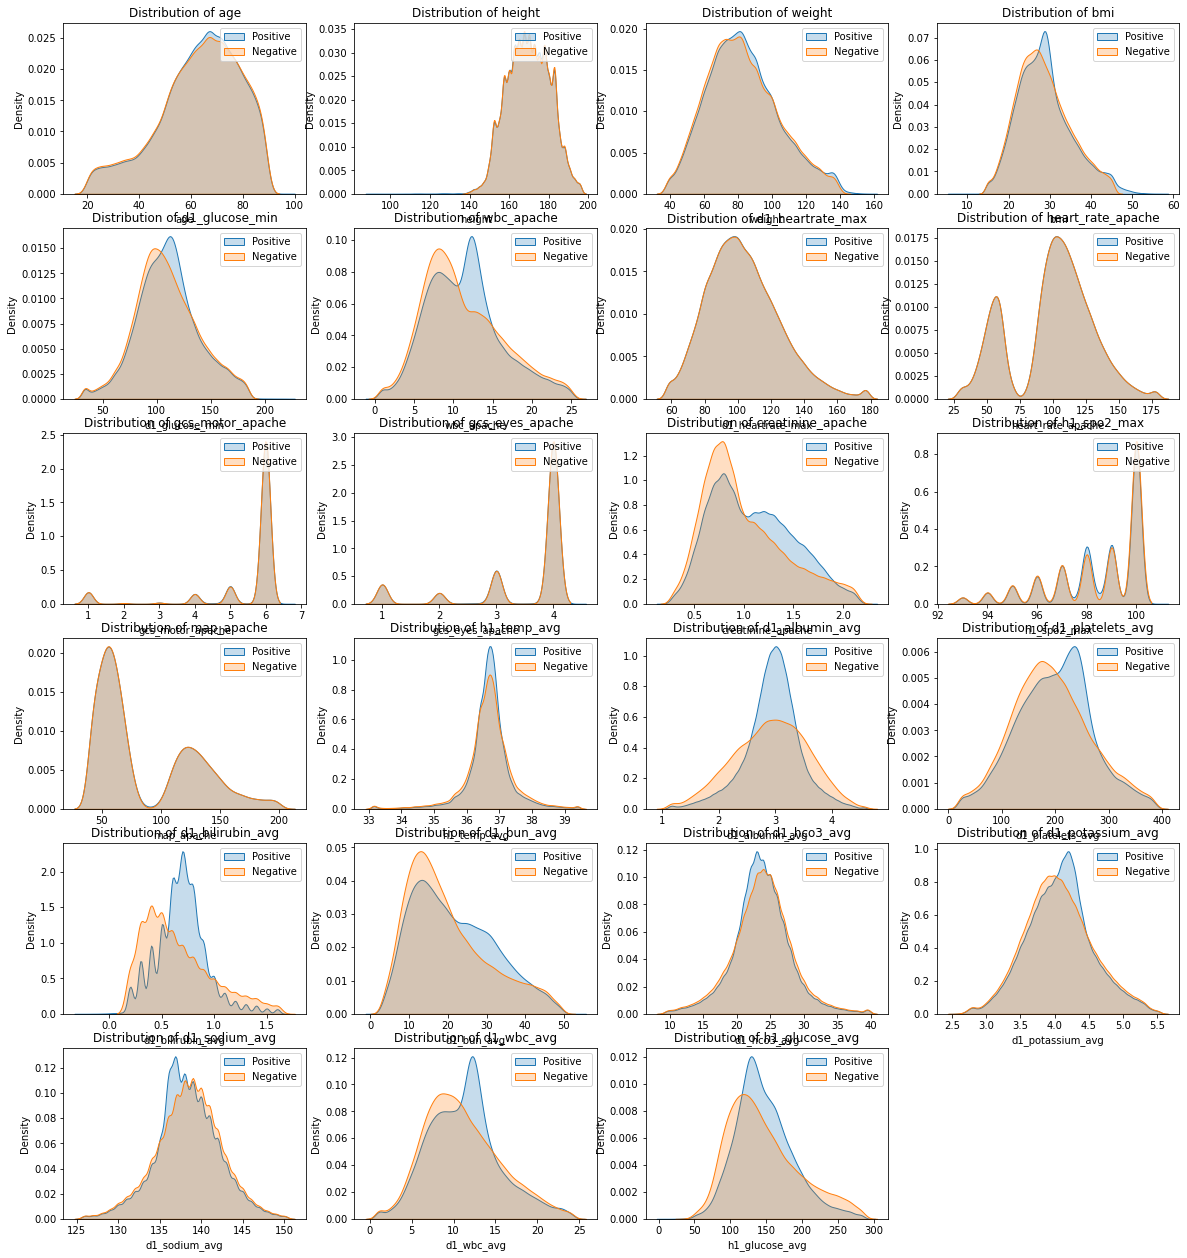

In [89]:
makeKdeplotPos(df3c,df4b,missing_list)

In [90]:
df3a.to_csv(r"..\cmp 7023\DF_NEW_IMPUTED.csv".replace("\\","/"),index=False)


In [190]:
df3b.drop(columns=['d1_albumin_max','d1_albumin_min',
          'd1_bilirubin_max', 'd1_bilirubin_min',
          'h1_glucose_max', 'h1_glucose_min'],inplace=True)

KeyError: "['d1_albumin_max' 'd1_albumin_min' 'd1_bilirubin_max' 'd1_bilirubin_min'\n 'h1_glucose_max' 'h1_glucose_min'] not found in axis"

In [193]:
df4=df3b.dropna()

## 1.4 Outliers Advanced

In [194]:
X_num=['age','elective_surgery', 'height', 'weight', 'bmi', 'readmission_status',
       'h1_temp_max', 'h1_temp_min', 'd1_bun_max',
       'd1_bun_min', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min',
       'd1_platelets_max', 'd1_platelets_min', 'd1_potassium_max',
       'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max',
       'd1_wbc_min', 'wbc_apache','intubated_apache', 'd1_heartrate_max', 'heart_rate_apache',
       'gcs_motor_apache', 'gcs_eyes_apache', 'creatinine_apache',
       'h1_spo2_max', 'map_apache', 'aids', 'cirrhosis', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma','solid_tumor_with_metastasis',
       'ventilated_apache','d1_albumin_max_missing','d1_albumin_min_missing',
          'd1_bilirubin_max_missing', 'd1_bilirubin_min_missing',
          'h1_glucose_max_missing', 'h1_glucose_min_missing']

In [182]:
X_DATA=df3b[['gender', 'ethnicity', 'age',
       'elective_surgery', 'height', 'weight', 'bmi', 'readmission_status',
       'icu_type', 'h1_temp_max', 'h1_temp_min', 'd1_albumin_max',
       'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_bun_max',
       'd1_bun_min', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min',
       'd1_platelets_max', 'd1_platelets_min', 'd1_potassium_max',
       'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max',
       'd1_wbc_min', 'h1_glucose_max', 'h1_glucose_min', 'wbc_apache',
       'intubated_apache', 'd1_heartrate_max', 'heart_rate_apache',
       'gcs_motor_apache', 'gcs_eyes_apache', 'creatinine_apache',
       'h1_spo2_max', 'map_apache', 'aids', 'cirrhosis', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'ventilated_apache','d1_albumin_max_missing','d1_albumin_min_missing',
          'd1_bilirubin_max_missing', 'd1_bilirubin_min_missing',
          'h1_glucose_max_missing', 'h1_glucose_min_missing']]
y_DATA=df3b['diabetes_mellitus']

X_DATA

gender         ethnicity   age  elective_surgery  height  weight  \
0          M         Caucasian  68.0                 0   180.3   73.90   
1          F         Caucasian  25.0                 0   172.7   95.30   
2          F         Caucasian  81.0                 1   165.1   61.70   
3          M         Caucasian   NaN                 0   188.0     NaN   
4          F         Caucasian  77.0                 0   160.0   70.20   
5          M         Caucasian  67.0                 0   190.5  100.00   
6          F         Caucasian  59.0                 0   165.1     NaN   
7          F         Caucasian  78.0                 0   160.0     NaN   
8          M         Caucasian  80.0                 0   170.2  103.30   
9          F         Caucasian   NaN                 1   160.0     NaN   
10         M         Caucasian  68.0                 1   172.7   82.20   
11         M         Caucasian  71.0                 0   177.8  121.70   
12         F         Caucasian  60.0                 0   165.1     NaN   
13         M         Caucasian  60.0                 1   170.2  102.70   
14         M         Caucasian  75.0                 1   182.9  112.00   
15         M         Caucasian  67.0                 0   177.8   90.70   
16         M         Caucasian  68.0                 0   172.7  102.90   
17         F         Caucasian  85.0                 0   149.9   79.70   
18         F         Caucasian  77.0                 1   165.1   88.00   
19         F         Caucasian  58.0                 0   165.1     NaN   
20         M         Caucasian  74.0                 0   167.6   71.10   
21         M         Caucasian  67.0                 0   170.2   96.60   
22         M         Caucasian  68.0                 0   182.9   86.80   
23         F         Caucasian  71.0                 0   160.0   89.80   
24         M         Caucasian  72.0                 0   170.2   72.50   
...      ...               ...   ...               ...     ...     ...   
79104      F         Caucasian  66.0                 0   152.4   70.30   
79105      F         Caucasian  51.0                 0   162.5   99.00   
79106      F         Caucasian  50.0                 0   165.1   95.30   
79107      M         Caucasian  53.0                 1   172.7   94.00   
79108      F         Caucasian  57.0                 0   175.0   94.50   
79109      F         Caucasian  21.0                 0   168.0   74.70   
79110      F         Caucasian  81.0                 0   157.5   78.20   
79111      M         Caucasian  55.0                 0   182.9   86.20   
79112      F         Caucasian  71.0                 0   165.1   59.00   
79113      M             Asian  31.0                 0   165.1  117.93   
79114      M         Caucasian  84.0                 0   167.6   47.00   
79115      M          Hispanic  57.0                 0   175.3   78.90   
79116      M         Caucasian   NaN                 0   173.0   80.92   
79117      M         Caucasian  42.0                 0   172.7  130.10   
79118      F         Caucasian  71.0                 0   165.0  107.40   
79119      F         Caucasian  85.0                 0   157.5   59.30   
79120      M         Caucasian  25.0                 1   177.8  102.10   
79121      M         Caucasian  75.0                 0   180.0  109.20   
79122      M         Caucasian  77.0                 0   172.0   92.90   
79123      F         Caucasian   NaN                 0   149.9   49.20   
79124      F         Caucasian  86.0                 0   167.6   86.20   
79125      F         Caucasian  55.0                 0   165.1   91.70   
79126      M  African American  61.0                 0   173.0   88.10   
79127      M         Caucasian  80.0                 0   175.0   84.80   
79128      M         Caucasian  88.0                 0   170.1   90.90   

             bmi  readmission_status      icu_type  h1_temp_max  h1_temp_min  \
0      22.732803                   0         CTICU         39.5         37.5 

In [196]:
X_1=df4[['age','height', 'weight', 'bmi', 
     'd1_bun_max','d1_bun_min', 'd1_glucose_min', 
    'd1_platelets_max', 'd1_platelets_min', 'd1_potassium_max',
       'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max',
    'd1_wbc_min',   'wbc_apache',
         'creatinine_apache','h1_spo2_max','d1_albumin_max_missing','d1_albumin_min_missing',
          'd1_bilirubin_max_missing', 'd1_bilirubin_min_missing',
           'h1_glucose_max_missing', 'h1_glucose_min_missing']]
y_1=df4['diabetes_mellitus']

In [449]:
#change String data to Object
df3a[['gender','ethnicity','icu_type']].astype('object')
df3a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4088 entries, 65 to 79086
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   encounter_id                 4088 non-null   int64  
 1   hospital_id                  4088 non-null   int64  
 2   gender                       4088 non-null   object 
 3   ethnicity                    4088 non-null   object 
 4   age                          4088 non-null   float64
 5   elective_surgery             4088 non-null   int64  
 6   height                       4088 non-null   float64
 7   weight                       4088 non-null   float64
 8   bmi                          4088 non-null   float64
 9   readmission_status           4088 non-null   int64  
 10  icu_type                     4088 non-null   object 
 11  h1_temp_max                  4088 non-null   float64
 12  h1_temp_min                  4088 non-null   float64
 13  d1_albumin_max  

In [199]:
X_1.shape

(23260, 24)

### Using DBScan Method

In [208]:
from sklearn.neighbors import NearestNeighbors
import plotly.express as px

neighbors = 24
# X_embedded is your data
nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(X_1)
distances, indices = nbrs.kneighbors(X_1)
distance_desc = sorted(distances[:,neighbors-1], reverse=True)
px.line(x=list(range(1,len(distance_desc )+1)),y= distance_desc )

49.757862085126895

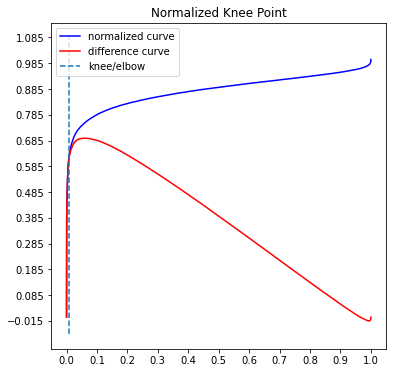

In [209]:
from kneed import KneeLocator
kneedle = KneeLocator(range(1,len(distance_desc)+1),  #x values
                      distance_desc, # y values
                      S=1.0, #parameter suggested from paper
                      curve="convex", #parameter from figure
                      direction="decreasing") #parameter from figure

kneedle.plot_knee_normalized()
kneedle.knee_y

In [210]:
#import the implementation of this algorihm from sklearn
from sklearn.cluster import DBSCAN

#Use the algorithm for outlier detection, the retun in clusters will show the membership of each point
#Any point labelled as -1 is an outlier

outlier_detection = DBSCAN(min_samples = 24, eps = 49)
clusters = outlier_detection.fit_predict(X_1)

#Count total number of outliers as count of those labelled as -1
TotalOutliers=list(clusters).count(-1)
# print (clusters)
print("Total number of outliers identified is: ",TotalOutliers)

Total number of outliers identified is:  41


In [220]:
# select all rows that are not outliers and create a boolean mask
mask = clusters != -1
# Apply mask to y and check shape
y1= y_1[mask]
print (y1.shape)
#Apply mask to X and check shape 
X1=X_1[mask]
print(X1.shape)

(23219,)
(23219, 24)


### Using Isolation Method

In [204]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

In [212]:
clf = IsolationForest(max_samples=23260, random_state=1, contamination=0.01)
preds=clf.fit_predict(X_1)
totalOutliers=0
for pred in preds:
    if pred == -1:
        totalOutliers+=1
print("Total number of outliers identified is: ",totalOutliers)


C:\Users\PC\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



Total number of outliers identified is:  233


In [213]:
# select all rows that are not outliers and create a boolean mask
mask = preds != -1
# Apply mask to y and check shape
y2= y_1[mask]
print (y2.shape)

#Apply mask to X and check shape 
X2=X_1[mask]
print(X2.shape)

(23027,)
(23027, 24)


### Using Local Outlier Factor

Number of predicted outliers: 233


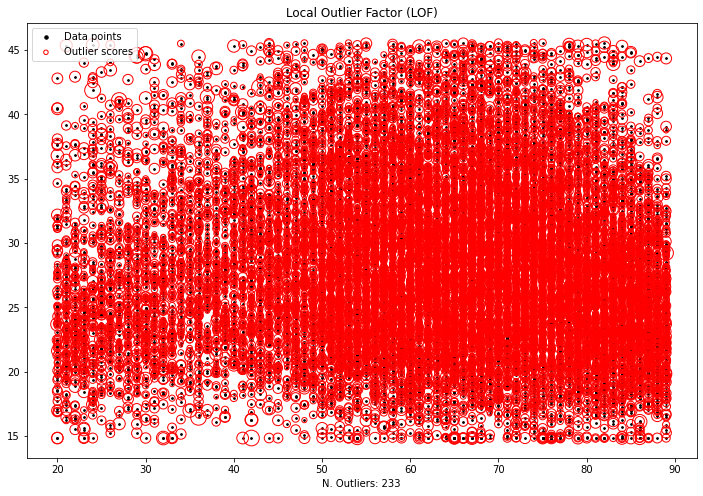

In [215]:
from sklearn.neighbors import LocalOutlierFactor
np.random.seed(42)
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=24, contamination=0.01)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X_1)

#print ("Predicted outliers: \n",y_pred)

#Calculate number of outliers
outlierN = len([i for i in y_pred if i == -1])
print ("Number of predicted outliers:",outlierN)

#Let us see graphically how the outliers are identified
#Use outlier scores calculated by the algorithm to plot a circle around the outlier proportional to score.

X_scores = clf.negative_outlier_factor_

plt.figure(figsize=(12,8))
plt.title("Local Outlier Factor (LOF)")

#Convert the df to an array for the purpose of the scatterplot
Xol = X_1.to_numpy()

#Use scatter 
plt.scatter(Xol[:, 0], Xol[:, 3], color='k', s=3, label='Data points')

# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(Xol[:, 0], Xol[:, 3], s=300 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
#plt.xlim((0, 14))
#plt.ylim((0, 6))
plt.xlabel("N. Outliers: %d" % (outlierN))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [12]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [216]:
# select all rows that are not outliers and create a boolean mask
mask = y_pred != -1
# Apply mask to y and check shape
y3= y_1[mask]
print (y3.shape)

#Apply mask to X and check shape 
X3=X_1[mask]
print(X3.shape)

(23027,)
(23027, 24)


Text(0.5, 1.0, 'Scatter plot for LOF')

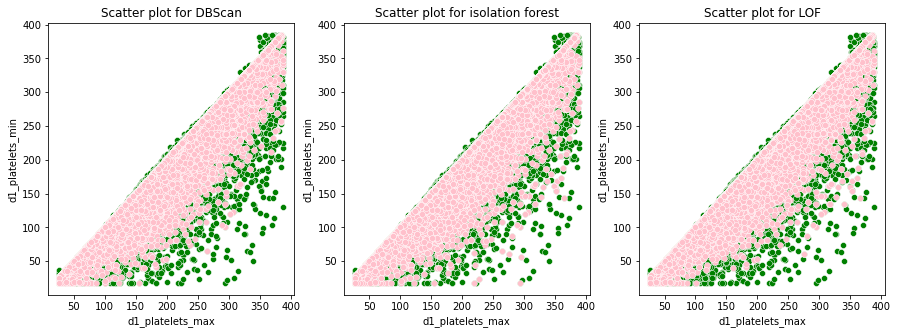

In [219]:
# Set the width and height of the figure
plt.figure(figsize=(15,5))

# Plot scatterplot for DBScan
plt.subplot(1,3,1)
sns.scatterplot(x=df3a['d1_platelets_max'], y=df3a['d1_platelets_min'],color='green')
sns.scatterplot(x=X1['d1_platelets_max'], y=X1['d1_platelets_min'],color='pink',alpha=1)
plt.title('Scatter plot for DBScan')

# Plot scatter for isolation forest
plt.subplot(1,3,2)
sns.scatterplot(x=df3a['d1_platelets_max'], y=df3a['d1_platelets_min'],color='green')
sns.scatterplot(x=X2['d1_platelets_max'], y=X2['d1_platelets_min'],color='pink',alpha=1)
plt.title('Scatter plot for isolation forest')

# Plot scatterplot for LOF
plt.subplot(1,3,3)
sns.scatterplot(x=df3a['d1_platelets_max'], y=df3a['d1_platelets_min'],color='green')
sns.scatterplot(x=X3['d1_platelets_max'], y=X3['d1_platelets_min'],color='pink',alpha=1)
plt.title('Scatter plot for LOF')

# 2. Data Preprocessing

## 2.1 Features Construction

In [16]:
df4a=df3b.copy()
df4a.shape

(79129, 55)

In [228]:
df4a=df4.loc[list(X1.index),:]
df4a.shape

(23219, 50)

In [15]:
y_1.value_counts()

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_18932/1454813570.py, line 1)

In [20]:
X_2=df4a[['encounter_id', 'hospital_id', 'gender', 'ethnicity', 'age',
       'elective_surgery', 'height', 'weight', 'bmi', 'readmission_status',
       'icu_type', 'h1_temp_max', 'h1_temp_min',  'd1_bun_max',
       'd1_bun_min', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min',
       'd1_platelets_max', 'd1_platelets_min', 'd1_potassium_max',
       'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max',
       'd1_wbc_min', 'wbc_apache','intubated_apache', 'd1_heartrate_max', 'heart_rate_apache',
       'gcs_motor_apache', 'gcs_eyes_apache', 'creatinine_apache',
       'h1_spo2_max', 'map_apache', 'aids', 'cirrhosis', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'ventilated_apache',
       'd1_albumin_max_missing', 'd1_albumin_min_missing',
       'd1_bilirubin_max_missing', 'd1_bilirubin_min_missing',
       'h1_glucose_max_missing', 'h1_glucose_min_missing']]
y_2=df4a['diabetes_mellitus']

KeyError: "['d1_albumin_max_missing', 'd1_albumin_min_missing', 'd1_bilirubin_max_missing', 'd1_bilirubin_min_missing', 'h1_glucose_max_missing', 'h1_glucose_min_missing'] not in index"

In [229]:
df4a.to_csv(r"..\cmp 7023\df_fs.csv".replace("\\","/"),index=False)

### Categorical Encoding

In [58]:
df4a=pd.read_csv(r"..\cmp 7023\Diabetes_df_impute1.csv".replace("\\","/"))

In [672]:
df4a.reset_index(drop=True,inplace=True)
df4a

encounter_id  hospital_id gender         ethnicity   age  \
0           251453          151      M         Caucasian  70.0   
1           150266           77      M         Caucasian  85.0   
2           148452           83      M          Hispanic  25.0   
3           225509          151      F          Hispanic  60.0   
4           225921          118      F         Caucasian  69.0   
5           267224           83      F         Caucasian  71.0   
6           219127          118      M         Caucasian  62.0   
7           180967          118      M          Hispanic  48.0   
8           235279           81      F         Caucasian  29.0   
9           235014          151      M         Caucasian  59.0   
10          247946          118      M  African American  67.0   
11          263739          118      F         Caucasian  65.0   
12          255695           83      M   Native American  69.0   
13          164222           81      M         Caucasian  84.0   
14          191738           77      M         Caucasian  68.0   
15          230426          118      F         Caucasian  79.0   
16          181324           33      M         Caucasian  61.0   
17          169922           69      F         Caucasian  73.0   
18          197039           77      M         Caucasian  71.0   
19          254037          118      F         Caucasian  88.0   
20          247715          118      F          Hispanic  49.0   
21          153586           33      F         Caucasian  77.0   
22          200833          149      M         Caucasian  81.0   
23          222853           81      M         Caucasian  63.0   
24          253032          118      F          Hispanic  28.0   
...            ...          ...    ...               ...   ...   
4058        211436          118      M         Caucasian  88.0   
4059        269366          133      M         Caucasian  69.0   
4060        261731           17      M         Caucasian  75.0   
4061        156424          119      M         Caucasian  71.0   
4062        209360          176      F         Caucasian  70.0   
4063        190807          133      M  African American  57.0   
4064        221246            5      F          Hispanic  37.0   
4065        151262           39      M         Caucasian  60.0   
4066        165649           98      M     Other/Unknown  85.0   
4067        178852           62      F         Caucasian  87.0   
4068        277050          203      F         Caucasian  71.0   
4069        208405            6      F     Other/Unknown  49.0   
4070        177866          196      M         Caucasian  61.0   
4071        156688          147      M         Caucasian  29.0   
4072        251072          171      M         Caucasian  65.0   
4073        266206           28      F         Caucasian  25.0   
4074        221737          128      M         Caucasian  23.0   
4075        194222          204      M         Caucasian  73.0   
4076        157782          118      F         Caucasian  61.0   
4077        172536           76      M     Other/Unknown  63.0   
4078        261570          196      M         Caucasian  72.0   
4079        237895          176      F         Caucasian  72.0   
4080        244376           54      M         Caucasian  54.0   
4081        217235           86      M         Caucasian  61.0   
4082        157021          171      F         Caucasian  76.0   

      elective_surgery  height  weight        bmi  readmission_status  \
0                    0  172.70   81.40  27.292274                   0   
1                    0  170.20   71.00  24.509770                   0   
2                    0  177.80   68.00  21.510247                   0   
3                    0  154.90   95.60  39.843278                   0   
4                    0  156.20   82.20  33.690679                   0   
5                    0  152.40   71.20  30.655617                   0   
6                    1  177.80   86.20  27.267401             

In [59]:
df4a["gender"] = np.where(df4a["gender"].str.contains("M"), 1, 0)
df4a

encounter_id  hospital_id  gender         ethnicity   age  \
0            214826          118       1         Caucasian  68.0   
1            276985          118       0         Caucasian  25.0   
2            262220          118       0         Caucasian  81.0   
3            201746           33       1         Caucasian   NaN   
4            246060           81       0         Caucasian  77.0   
5            182697           83       1         Caucasian  67.0   
6            195124           83       0         Caucasian  59.0   
7            239271          118       0         Caucasian  78.0   
8            195396          118       1         Caucasian  80.0   
9            265580          118       0         Caucasian   NaN   
10           190593           83       1         Caucasian  68.0   
11           238278          118       1         Caucasian  71.0   
12           152924           77       0         Caucasian  60.0   
13           203791          118       1         Caucasian  60.0   
14           264641           83       1         Caucasian  75.0   
15           195469           69       1         Caucasian  67.0   
16           233204           83       1         Caucasian  68.0   
17           151386          118       0         Caucasian  85.0   
18           149300          151       0         Caucasian  77.0   
19           167704           83       0         Caucasian  58.0   
20           176487          118       1         Caucasian  74.0   
21           231602          118       1         Caucasian  67.0   
22           172824           83       1         Caucasian  68.0   
23           252173          118       0         Caucasian  71.0   
24           223210           81       1         Caucasian  72.0   
...             ...          ...     ...               ...   ...   
79104        152891          176       0         Caucasian  66.0   
79105        174409          188       0         Caucasian  51.0   
79106        245263            1       0         Caucasian  50.0   
79107        270552          185       1         Caucasian  53.0   
79108        208495           61       0         Caucasian  57.0   
79109        233719          111       0         Caucasian  21.0   
79110        175442          185       0         Caucasian  81.0   
79111        184939          157       1         Caucasian  55.0   
79112        189633          157       0         Caucasian  71.0   
79113        258381          101       1             Asian  31.0   
79114        222877          153       1         Caucasian  84.0   
79115        192999          123       1          Hispanic  57.0   
79116        266519          183       1         Caucasian   NaN   
79117        185524          174       1         Caucasian  42.0   
79118        161527           17       0         Caucasian  71.0   
79119        199542          203       0         Caucasian  85.0   
79120        273341          186       1         Caucasian  25.0   
79121        271917          110       1         Caucasian  75.0   
79122        237214          128       1         Caucasian  77.0   
79123        155212          164       0         Caucasian   NaN   
79124        166024          146       0         Caucasian  86.0   
79125        185015          154       0         Caucasian  55.0   
79126        173688           47       1  African American  61.0   
79127        169835          120       1         Caucasian  80.0   
79128        209541           55       1         Caucasian  88.0   

       elective_surgery  height  weight        bmi  readmission_status  \
0                     0   180.3   73.90  22.732803                   0   
1                     0   172.7   95.30  31.952749                   0   
2                     1   165.1   61.70  22.635548                   0   
3                     0   188.0     NaN        NaN                   0   
4                     0   160.0   70.20  27.421875                   0   
5                     0   

In [237]:
df4a.ethnicity.value_counts()

Caucasian           18525
African American     1958
Other/Unknown        1167
Hispanic             1082
Asian                 318
Native American       169
Name: ethnicity, dtype: int64

In [60]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df4a["ethnicity_code"] = ord_enc.fit_transform(df4a[["ethnicity"]])
df4a[["ethnicity", "ethnicity_code"]].value_counts()

ethnicity  ethnicity_code
0   Caucasian             2.0
1   Caucasian             2.0
2   Caucasian             2.0
3   Caucasian             2.0
4   Caucasian             2.0
5   Caucasian             2.0
6   Caucasian             2.0
7   Caucasian             2.0
8   Caucasian             2.0
9   Caucasian             2.0
10  Caucasian             2.0

In [61]:
from sklearn.preprocessing import OneHotEncoder
print(df4a.shape)
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing body_style column
enc_df = pd.DataFrame(enc.fit_transform(df4a[['icu_type']]).toarray())
#print(enc_df.columns)
#df=df.join( enc_df)
print(enc_df)
enc_df.columns = enc.get_feature_names(['ICU'])
print(enc_df)
df4a= pd.concat([df4a, enc_df], axis=1)
print(df4a)

(79129, 51)
         0    1    2    3    4    5    6    7
0      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
1      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
2      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
3      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
4      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
5      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
6      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
7      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
8      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
9      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
10     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
11     0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
12     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
13     0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
14     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
15     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
16     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
17     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
18     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
19     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
20     0.0  0.0  0.0  

C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [62]:
df4b=df4a.drop(columns=['ethnicity','icu_type'])

In [63]:
df4b.columns

Index(['encounter_id', 'hospital_id', 'gender', 'age', 'elective_surgery',
       'height', 'weight', 'bmi', 'readmission_status', 'h1_temp_max',
       'h1_temp_min', 'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max',
       'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 'd1_glucose_min',
       'd1_hco3_max', 'd1_hco3_min', 'd1_platelets_max', 'd1_platelets_min',
       'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max',
       'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min', 'h1_glucose_max',
       'h1_glucose_min', 'wbc_apache', 'intubated_apache', 'd1_heartrate_max',
       'heart_rate_apache', 'gcs_motor_apache', 'gcs_eyes_apache',
       'creatinine_apache', 'h1_spo2_max', 'map_apache', 'aids', 'cirrhosis',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'ventilated_apache', 'diabetes_mellitus',
       'ethnicity_code', 'ICU_CCU-CTICU', 'ICU_CSICU', 'ICU_CTICU',
       'ICU_Cardiac ICU', 'ICU_MICU', 'ICU_Med-Su

In [64]:
df4b.drop(columns=['encounter_id','hospital_id','readmission_status'], inplace=True)

In [65]:
df4b['h1_temp_avg'] = df4b[['h1_temp_max', 'h1_temp_min']].mean(axis=1)
df4b['d1_albumin_avg'] = df4b[['d1_albumin_max', 'd1_albumin_min']].mean(axis=1)
df4b['d1_platelets_avg'] = df4b[['d1_platelets_max', 'd1_platelets_min']].mean(axis=1)
df4b['d1_bilirubin_avg'] = df4b[['d1_bilirubin_max', 'd1_bilirubin_min']].mean(axis=1)
df4b['d1_bun_avg'] = df4b[['d1_bun_max', 'd1_bun_min']].mean(axis=1)
df4b['d1_hco3_avg'] = df4b[['d1_hco3_max', 'd1_hco3_min']].mean(axis=1)
df4b['d1_potassium_avg'] = df4b[['d1_potassium_max', 'd1_potassium_min']].mean(axis=1)
df4b['d1_sodium_avg'] = df4b[['d1_sodium_max', 'd1_sodium_min']].mean(axis=1)
df4b['d1_wbc_avg'] = df4b[['d1_wbc_max', 'd1_wbc_min']].mean(axis=1)
df4b['h1_glucose_avg'] = df4b[['h1_glucose_max', 'h1_glucose_min']].mean(axis=1)

df4b.drop(columns=['d1_bun_max', 'd1_bun_min','h1_temp_max', 'h1_temp_min','d1_albumin_max', 'd1_albumin_min',
                  'd1_platelets_max','d1_platelets_min','d1_bilirubin_max', 'd1_bilirubin_min',
                 'd1_hco3_max', 'd1_hco3_min', 'd1_potassium_max', 'd1_potassium_min',
                  'd1_sodium_max', 'd1_sodium_min','d1_wbc_max', 'd1_wbc_min',
                  'h1_glucose_max', 'h1_glucose_min'],inplace=True)

In [66]:
df4a=df4b[['d1_albumin_avg','h1_temp_avg',
          'd1_bilirubin_avg', 'd1_platelets_avg',
          'd1_bun_avg', 'h1_glucose_avg',
           'd1_hco3_avg','d1_potassium_avg',
           'd1_wbc_avg','d1_sodium_avg']]
df4a

d1_albumin_avg  h1_temp_avg  d1_bilirubin_avg  d1_platelets_avg  \
0                2.30        38.50               0.4           233.000   
1                 NaN        36.70               NaN               NaN   
2                 NaN        35.20               NaN           120.500   
3                 NaN          NaN               NaN               NaN   
4                1.60        36.30               0.5               NaN   
5                 NaN        36.70               NaN           159.000   
6                 NaN        35.90               NaN           286.500   
7                 NaN        36.25               NaN           153.500   
8                 NaN          NaN               NaN           367.000   
9                3.05        36.60               0.7           146.500   
10                NaN        36.40               NaN           204.000   
11                NaN          NaN               NaN           235.000   
12               1.55        33.15               0.9           197.000   
13                NaN        35.70               NaN           203.000   
14                NaN        36.25               NaN           237.000   
15               2.30        36.30               0.5           253.000   
16                NaN        36.40               NaN           275.000   
17               2.40        36.30               0.5           134.000   
18               1.50        35.80               0.5           325.000   
19                NaN        36.80               NaN           142.000   
20               2.90        37.45               NaN            22.775   
21                NaN          NaN               NaN           230.000   
22                NaN        36.70               NaN           119.000   
23               2.60        36.80               0.3           256.000   
24                NaN        36.60               NaN               NaN   
...               ...          ...               ...               ...   
79104             NaN        37.30               NaN               NaN   
79105             NaN          NaN               NaN           191.000   
79106             NaN        34.80               NaN           211.000   
79107             NaN          NaN               NaN               NaN   
79108            3.50        36.50               1.0           228.000   
79109             NaN        36.80               NaN               NaN   
79110             NaN        37.40               NaN           355.500   
79111            3.30          NaN               0.6           225.500   
79112            3.30          NaN               NaN           213.000   
79113            2.45          NaN               NaN            80.000   
79114             NaN        35.90               NaN           333.000   
79115            3.70          NaN               0.8           294.000   
79116             NaN          NaN               NaN               NaN   
79117             NaN        37.10               NaN               NaN   
79118            2.70        37.70               0.5           191.000   
79119             NaN        36.80               NaN           184.000   
79120             NaN        36.40               NaN           284.000   
79121             NaN        36.15               NaN           126.500   
79122            2.90        37.30               0.7               NaN   
79123             NaN          NaN               NaN           112.000   
79124             NaN        36.70               NaN           186.000   
79125             NaN        36.60               NaN           146.000   
79126            2.60        36.80               0.4           174.000   
79127            2.00          NaN               0.2           249.000   
79128            3.00        36.30               0.7           174.000   

       d1_bun_avg  h1_glucose_avg  d1_hco3_avg  d1_potassium_avg  d1_wbc_avg  \
0            30.5             NaN         17.0              3.70       14.10  

In [67]:
for i in ['d1_albumin_avg','h1_temp_avg',
          'd1_bilirubin_avg', 'd1_platelets_avg',
          'd1_bun_avg', 'h1_glucose_avg','d1_hco3_avg',
         'd1_potassium_avg','d1_wbc_avg','d1_sodium_avg']:
    df4a[i].where(df4a[i].isna()==True,0,inplace=True)
    df4a[i].where(df4a[i].isna()==False,1,inplace=True)
    
df4a.columns=['d1_albumin_missing','h1_temp_missing',
          'd1_bilirubin_missing', 'd1_platelets_missing',
          'd1_bun_missing', 'h1_glucose_missing','d1_hco3_missing',
         'd1_potassium_missing','d1_wbc_missing','d1_sodium_missing']
df4a

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


d1_albumin_missing  h1_temp_missing  d1_bilirubin_missing  \
0                     0.0              0.0                   0.0   
1                     1.0              0.0                   1.0   
2                     1.0              0.0                   1.0   
3                     1.0              1.0                   1.0   
4                     0.0              0.0                   0.0   
5                     1.0              0.0                   1.0   
6                     1.0              0.0                   1.0   
7                     1.0              0.0                   1.0   
8                     1.0              1.0                   1.0   
9                     0.0              0.0                   0.0   
10                    1.0              0.0                   1.0   
11                    1.0              1.0                   1.0   
12                    0.0              0.0                   0.0   
13                    1.0              0.0                   1.0   
14                    1.0              0.0                   1.0   
15                    0.0              0.0                   0.0   
16                    1.0              0.0                   1.0   
17                    0.0              0.0                   0.0   
18                    0.0              0.0                   0.0   
19                    1.0              0.0                   1.0   
20                    0.0              0.0                   1.0   
21                    1.0              1.0                   1.0   
22                    1.0              0.0                   1.0   
23                    0.0              0.0                   0.0   
24                    1.0              0.0                   1.0   
...                   ...              ...                   ...   
79104                 1.0              0.0                   1.0   
79105                 1.0              1.0                   1.0   
79106                 1.0              0.0                   1.0   
79107                 1.0              1.0                   1.0   
79108                 0.0              0.0                   0.0   
79109                 1.0              0.0                   1.0   
79110                 1.0              0.0                   1.0   
79111                 0.0              1.0                   0.0   
79112                 0.0              1.0                   1.0   
79113                 0.0              1.0                   1.0   
79114                 1.0              0.0                   1.0   
79115                 0.0              1.0                   0.0   
79116                 1.0              1.0                   1.0   
79117                 1.0              0.0                   1.0   
79118                 0.0              0.0                   0.0   
79119                 1.0              0.0                   1.0   
79120                 1.0              0.0                   1.0   
79121                 1.0              0.0                   1.0   
79122                 0.0              0.0                   0.0   
79123                 1.0              1.0                   1.0   
79124                 1.0              0.0                   1.0   
79125                 1.0              0.0                   1.0   
79126                 0.0              0.0                   0.0   
79127                 0.0              1.0                   0.0   
79128                 0.0              0.0                   0.0   

       d1_platelets_missing  d1_bun_missing  h1_glucose_missing  \
0                       0.0             0.0                 1.0   
1                       1.0             1.0                 1.0   
2                       0.0             1.0                 1.0   
3                       1.0             1.0                 1.0   
4                       1.0             0.0                 0.0   
5                       0.0             0.0                 1.0   
6

In [71]:
df4b=pd.concat([df4b,df4a],axis=1)
df4b.shape

(79129, 54)

In [72]:
df4b

gender   age  elective_surgery  height  weight        bmi  \
0           1  68.0                 0   180.3   73.90  22.732803   
1           0  25.0                 0   172.7   95.30  31.952749   
2           0  81.0                 1   165.1   61.70  22.635548   
3           1   NaN                 0   188.0     NaN        NaN   
4           0  77.0                 0   160.0   70.20  27.421875   
5           1  67.0                 0   190.5  100.00  27.555611   
6           0  59.0                 0   165.1     NaN        NaN   
7           0  78.0                 0   160.0     NaN        NaN   
8           1  80.0                 0   170.2  103.30  35.659989   
9           0   NaN                 1   160.0     NaN        NaN   
10          1  68.0                 1   172.7   82.20  27.560503   
11          1  71.0                 0   177.8  121.70  38.497016   
12          0  60.0                 0   165.1     NaN        NaN   
13          1  60.0                 1   170.2  102.70  35.452865   
14          1  75.0                 1   182.9  112.00  33.480398   
15          1  67.0                 0   177.8   90.70  28.690874   
16          1  68.0                 0   172.7  102.90  34.500922   
17          0  85.0                 0   149.9   79.70  35.469499   
18          0  77.0                 1   165.1   88.00  32.284088   
19          0  58.0                 0   165.1     NaN        NaN   
20          1  74.0                 0   167.6   71.10  25.311715   
21          1  67.0                 0   170.2   96.60  33.347096   
22          1  68.0                 0   182.9   86.80  25.947308   
23          0  71.0                 0   160.0   89.80  35.078125   
24          1  72.0                 0   170.2   72.50  25.027582   
...       ...   ...               ...     ...     ...        ...   
79104       0  66.0                 0   152.4   70.30  30.268116   
79105       0  51.0                 0   162.5   99.00  37.491124   
79106       0  50.0                 0   165.1   95.30  34.962200   
79107       1  53.0                 1   172.7   94.00  31.516877   
79108       0  57.0                 0   175.0   94.50  30.857143   
79109       0  21.0                 0   168.0   74.70  26.466837   
79110       0  81.0                 0   157.5   78.20  31.524313   
79111       1  55.0                 0   182.9   86.20  25.767949   
79112       0  71.0                 0   165.1   59.00  21.645014   
79113       1  31.0                 0   165.1  117.93  43.264347   
79114       1  84.0                 0   167.6   47.00  16.732076   
79115       1  57.0                 0   175.3   78.90  25.675161   
79116       1   NaN                 0   173.0   80.92  27.037322   
79117       1  42.0                 0   172.7  130.10  43.620699   
79118       0  71.0                 0   165.0  107.40  39.449036   
79119       0  85.0                 0   157.5   59.30  23.905266   
79120       1  25.0                 1   177.8  102.10  32.297003   
79121       1  75.0                 0   180.0  109.20  33.703704   
79122       1  77.0                 0   172.0   92.90  31.402109   
79123       0   NaN                 0   149.9   49.20  21.895851   
79124       0  86.0                 0   167.6   86.20  30.687339   
79125       0  55.0                 0   165.1   91.70  33.641487   
79126       1  61.0                 0   173.0   88.10  29.436333   
79127       1  80.0                 0   175.0   84.80  27.689796   
79128       1  88.0                 0   170.1   90.90  31.416316   

       d1_glucose_min  wbc_apache  intubated_apache  d1_heartrate_max  \
0               109.0       14.10                 0             119.0   
1                 NaN         NaN                 0              96.0   
2                88.0        8.00                 1             116.0   
3                 NaN         NaN                 0              89.0   
4               128.0       12.70                 0             118.0   
5               125.0       10.9

In [73]:
df4b.to_csv(r"..\cmp 7023\DF_NEW2.csv".replace("\\","/"),index=False)

### Feature Selection

In [82]:
df4b=pd.read_csv(r"..\cmp 7023\DF_NEW2.csv".replace("\\","/"))

In [8]:
df4b=pd.read_csv("DF_NEW_IMPUTED.csv".replace("\\","/"))

In [6]:
df4b.columns

Index(['gender', 'age', 'elective_surgery', 'height', 'weight', 'bmi',
       'd1_glucose_min', 'wbc_apache', 'intubated_apache', 'd1_heartrate_max',
       'heart_rate_apache', 'gcs_motor_apache', 'gcs_eyes_apache',
       'creatinine_apache', 'h1_spo2_max', 'map_apache', 'aids', 'cirrhosis',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'ventilated_apache', 'diabetes_mellitus',
       'ethnicity_code', 'ICU_CCU-CTICU', 'ICU_CSICU', 'ICU_CTICU',
       'ICU_Cardiac ICU', 'ICU_MICU', 'ICU_Med-Surg ICU', 'ICU_Neuro ICU',
       'ICU_SICU', 'h1_temp_avg', 'd1_albumin_avg', 'd1_platelets_avg',
       'd1_bilirubin_avg', 'd1_bun_avg', 'd1_hco3_avg', 'd1_potassium_avg',
       'd1_sodium_avg', 'd1_wbc_avg', 'h1_glucose_avg', 'd1_albumin_missing',
       'h1_temp_missing', 'd1_bilirubin_missing', 'd1_platelets_missing',
       'd1_bun_missing', 'h1_glucose_missing', 'd1_hco3_missing',
       'd1_potassium_missing', 'd1_wbc_missin

In [9]:
X_3=df4b[['gender', 'age', 'elective_surgery', 'height', 'weight', 'bmi',
       'd1_glucose_min', 'wbc_apache', 'intubated_apache', 'd1_heartrate_max',
       'heart_rate_apache', 'gcs_motor_apache', 'gcs_eyes_apache',
       'creatinine_apache', 'h1_spo2_max', 'map_apache', 'aids', 'cirrhosis',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'ventilated_apache',
       'ethnicity_code', 'ICU_CCU-CTICU', 'ICU_CSICU', 'ICU_CTICU',
       'ICU_Cardiac ICU', 'ICU_MICU', 'ICU_Med-Surg ICU', 'ICU_Neuro ICU',
       'ICU_SICU', 'h1_temp_avg', 'd1_albumin_avg', 'd1_platelets_avg',
       'd1_bilirubin_avg', 'd1_bun_avg', 'd1_hco3_avg', 'd1_potassium_avg',
       'd1_sodium_avg', 'd1_wbc_avg', 'h1_glucose_avg', 'd1_albumin_missing',
       'h1_temp_missing', 'd1_bilirubin_missing', 'd1_platelets_missing',
       'd1_bun_missing', 'h1_glucose_missing', 'd1_hco3_missing',
       'd1_potassium_missing', 'd1_wbc_missing', 'd1_sodium_missing']]
y_3=df4b['diabetes_mellitus']

In [95]:
from sklearn.feature_selection import SelectKBest, f_regression
# configure to select all features
selector = SelectKBest(score_func=f_regression, k='all')

# transform train input data
Xfs = selector.fit_transform(X_3,y_3)

#Retrieve the column names for the selected columns
names = X_3.columns.values[selector.get_support()]
#and their scores
scores = selector.scores_[selector.get_support()]
#pair the values together with the zip function
names_scores = list(zip(names, scores))
#Store the information in a data frame
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)
#Look at shape of new data
Xfs.shape

              Feat_names      F_Scores
42        h1_glucose_avg  11657.816311
5                    bmi   3040.631504
37            d1_bun_avg   2685.727493
13     creatinine_apache   2487.905649
4                 weight   2360.438660
1                    age    597.102871
48    h1_glucose_missing    569.568870
6         d1_glucose_min    440.971969
39      d1_potassium_avg    392.098273
40         d1_sodium_avg    245.112871
36      d1_bilirubin_avg    189.820634
31         ICU_Neuro ICU    182.375553
52     d1_sodium_missing    135.742905
47        d1_bun_missing    128.019901
34        d1_albumin_avg    109.233554
26             ICU_CSICU    103.958978
50  d1_potassium_missing     98.529940
9       d1_heartrate_max     77.362701
38           d1_hco3_avg     72.050933
49       d1_hco3_missing     61.100812
12       gcs_eyes_apache     57.049207
35      d1_platelets_avg     53.859173
11      gcs_motor_apache     53.138200
32              ICU_SICU     46.943167
10     heart_rate_apache 

(79129, 53)

In [97]:
choosen_cols=ns_df_sorted.Feat_names[:17].tolist()
choosen_cols

['h1_glucose_avg',
 'bmi',
 'd1_bun_avg',
 'creatinine_apache',
 'weight',
 'age',
 'h1_glucose_missing',
 'd1_glucose_min',
 'd1_potassium_avg',
 'd1_sodium_avg',
 'd1_bilirubin_avg',
 'ICU_Neuro ICU',
 'd1_sodium_missing',
 'd1_bun_missing',
 'd1_albumin_avg',
 'ICU_CSICU',
 'd1_potassium_missing']

In [98]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif,f_classif
# configure to select all features
selector = SelectKBest(score_func=mutual_info_classif, k='all')

# transform train input data
Xfs2 = selector.fit_transform(X_3,y_3)

#Retrieve the column names for the selected columns
names = X_3.columns.values[selector.get_support()]
#and their scores
scores = selector.scores_[selector.get_support()]
#pair the values together with the zip function
names_scores = list(zip(names, scores))
#Store the information in a data frame
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)
#Look at shape of new data
Xfs2.shape

                     Feat_names  F_Scores
42               h1_glucose_avg  0.081289
6                d1_glucose_min  0.022274
13            creatinine_apache  0.021379
5                           bmi  0.019983
37                   d1_bun_avg  0.019222
4                        weight  0.014517
24               ethnicity_code  0.008862
1                           age  0.008622
12              gcs_eyes_apache  0.008245
11             gcs_motor_apache  0.007815
45         d1_bilirubin_missing  0.006800
48           h1_glucose_missing  0.006578
40                d1_sodium_avg  0.003928
39             d1_potassium_avg  0.003613
30             ICU_Med-Surg ICU  0.003542
32                     ICU_SICU  0.003124
38                  d1_hco3_avg  0.002689
47               d1_bun_missing  0.002380
2              elective_surgery  0.002246
0                        gender  0.002245
33                  h1_temp_avg  0.002175
10            heart_rate_apache  0.002165
25                ICU_CCU-CTICU  0

(79129, 53)

In [100]:
X_4=X_3[choosen_cols]
X_4=X_4.reindex(sorted(X_4.columns), axis=1)

### Correlated

In [105]:
corr=X_4.corr()
corr

ICU_CSICU  ICU_Neuro ICU       age       bmi  \
ICU_CSICU            1.000000      -0.058595  0.046002  0.013872   
ICU_Neuro ICU       -0.058595       1.000000 -0.034509 -0.005900   
age                  0.046002      -0.034509  1.000000 -0.062239   
bmi                  0.013872      -0.005900 -0.062239  1.000000   
d1_albumin_avg       0.006680       0.092069 -0.124545  0.081608   
d1_bilirubin_avg     0.004724      -0.029144  0.076845 -0.016505   
d1_bun_avg          -0.024505      -0.098981  0.355452  0.057933   
d1_glucose_min      -0.019936       0.041781  0.060184  0.122425   
d1_potassium_avg     0.025571      -0.044027  0.109009  0.082342   
d1_sodium_avg        0.030168       0.020678  0.040748 -0.028055   
d1_sodium_missing   -0.035695       0.025548 -0.002553 -0.014946   
h1_glucose_avg      -0.005874      -0.007463  0.035043  0.131295   
h1_glucose_missing  -0.093933       0.059140 -0.018861 -0.025909   

                    d1_albumin_avg  d1_bilirubin_avg  d1_bun_avg  \
ICU_CSICU                 0.006680          0.004724   -0.024505   
ICU_Neuro ICU             0.092069         -0.029144   -0.098981   
age                      -0.124545          0.076845    0.355452   
bmi                       0.081608         -0.016505    0.057933   
d1_albumin_avg            1.000000         -0.065882   -0.262501   
d1_bilirubin_avg         -0.065882          1.000000    0.080841   
d1_bun_avg               -0.262501          0.080841    1.000000   
d1_glucose_min            0.058111         -0.012182    0.000891   
d1_potassium_avg         -0.023002         -0.023655    0.298337   
d1_sodium_avg            -0.022414         -0.040767   -0.004442   
d1_sodium_missing         0.089408         -0.009005   -0.016554   
h1_glucose_avg           -0.004020         -0.025319    0.084629   
h1_glucose_missing        0.035625         -0.052342   -0.011020   

                    d1_glucose_min  d1_potassium_avg  d1_sodium_avg  \
ICU_CSICU                -0.019936          0.025571       0.030168   
ICU_Neuro ICU             0.041781         -0.044027       0.020678   
age                       0.060184          0.109009       0.040748   
bmi                       0.122425          0.082342      -0.028055   
d1_albumin_avg            0.058111         -0.023002      -0.022414   
d1_bilirubin_avg         -0.012182         -0.023655      -0.040767   
d1_bun_avg                0.000891          0.298337      -0.004442   
d1_glucose_min            1.000000          0.042817      -0.089464   
d1_potassium_avg          0.042817          1.000000      -0.120117   
d1_sodium_avg            -0.089464         -0.120117       1.000000   
d1_sodium_missing         0.004218         -0.015392      -0.040498   
h1_glucose_avg            0.606838          0.047203      -0.075165   
h1_glucose_missing        0.122336         -0.032145      -0.040541   

                    d1_sodium_missing  h1_glucose_avg  h1_glucose_missing  
ICU_CSICU                   -0.035695       -0.005874           -0.093933  
ICU_Neuro ICU                0.025548       -0.007463            0.059140  
age                         -0.002553        0.035043           -0.018861  
bmi                         -0.014946        0.131295           -0.025909  
d1_albumin_avg               0.089408       -0.004020            0.035625  
d1_bilirubin_avg            -0.009005       -0.025319           -0.052342  
d1_bun_avg                  -0.016554        0.084629           -0.011020  
d1_glucose_min               0.004218        0.606838            0.122336  
d1_potassium_avg            -0.015392        0.047203           -0.032145  
d1_sodium_avg               -0.040498       -0.075165           -0.040541  
d1_sodium_missing            1.000000       -0.039889            0.106924  
h1_glucose_avg              -0.039889        1.000000            0.021470  
h1_glucose_missing           0.106924        0.021470            1.000000

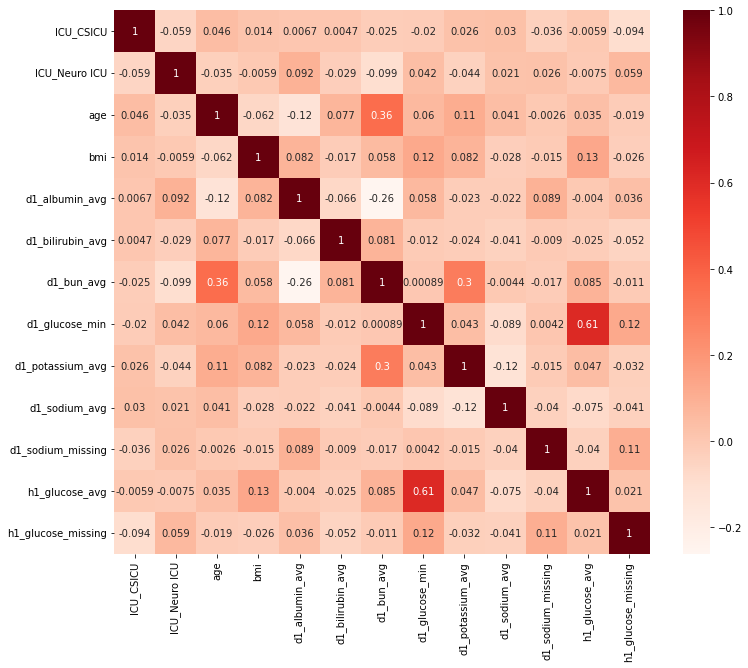

In [106]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [104]:
X_4.drop(columns=['weight','creatinine_apache','d1_potassium_missing'
                 ,'d1_bun_missing'],inplace=True)
X_4

ICU_CSICU  ICU_Neuro ICU   age        bmi  d1_albumin_avg  \
0            0.0            0.0  68.0  22.732803            2.30   
1            0.0            0.0  25.0  31.952749            3.81   
2            0.0            0.0  81.0  22.635548            2.68   
3            0.0            0.0  68.6  27.289326            3.27   
4            0.0            0.0  77.0  27.421875            1.60   
5            0.0            0.0  67.0  27.555611            3.24   
6            0.0            0.0  59.0  35.070008            3.32   
7            0.0            0.0  78.0  33.788573            2.79   
8            0.0            0.0  80.0  35.659989            3.07   
9            0.0            0.0  66.4  30.508516            3.05   
10           0.0            0.0  68.0  27.560503            2.92   
11           0.0            1.0  71.0  38.497016            3.01   
12           0.0            0.0  60.0  31.080316            1.55   
13           0.0            0.0  60.0  35.452865            2.68   
14           0.0            0.0  75.0  33.480398            3.33   
15           0.0            0.0  67.0  28.690874            2.30   
16           0.0            0.0  68.0  34.500922            3.22   
17           0.0            0.0  85.0  35.469499            2.40   
18           0.0            0.0  77.0  32.284088            1.50   
19           0.0            0.0  58.0  35.401738            3.08   
20           0.0            0.0  74.0  25.311715            2.90   
21           0.0            1.0  67.0  33.347096            3.28   
22           0.0            0.0  68.0  25.947308            2.79   
23           0.0            0.0  71.0  35.078125            2.60   
24           0.0            0.0  72.0  25.027582            2.74   
...          ...            ...   ...        ...             ...   
79104        0.0            1.0  66.0  30.268116            2.73   
79105        0.0            0.0  51.0  37.491124            3.56   
79106        0.0            0.0  50.0  34.962200            3.86   
79107        0.0            1.0  53.0  31.516877            3.35   
79108        0.0            0.0  57.0  30.857143            3.50   
79109        0.0            0.0  21.0  26.466837            3.85   
79110        0.0            0.0  81.0  31.524313            3.41   
79111        0.0            0.0  55.0  25.767949            3.30   
79112        0.0            0.0  71.0  21.645014            3.30   
79113        0.0            0.0  31.0  43.264347            2.45   
79114        0.0            0.0  84.0  16.732076            2.30   
79115        0.0            0.0  57.0  25.675161            3.70   
79116        0.0            0.0  66.0  27.037322            3.63   
79117        0.0            0.0  42.0  43.620699            3.41   
79118        0.0            0.0  71.0  39.449036            2.70   
79119        0.0            0.0  85.0  23.905266            2.72   
79120        0.0            0.0  25.0  32.297003            3.18   
79121        1.0            0.0  75.0  33.703704            2.96   
79122        0.0            0.0  77.0  31.402109            2.90   
79123        0.0            0.0  68.2  21.895851            2.74   
79124        0.0            0.0  86.0  30.687339            3.17   
79125        0.0            0.0  55.0  33.641487            2.74   
79126        0.0            0.0  61.0  29.436333            2.60   
79127        0.0            0.0  80.0  27.689796            2.00   
79128        0.0            0.0  88.0  31.416316            3.00   

       d1_bilirubin_avg  d1_bun_avg  d1_glucose_min  d1_potassium_avg  \
0                 0.400        30.5           109.0              3.70   
1                 0.446        12.9            97.6              4.31   
2                 0.920        23.3            88.0              4.25   
3                 0.740        18.0           136.4              4.40   
4                 0.500        10.0           128.0              4.00   
5                 0.720        1

In [285]:
corr=X_4.corr()
corr

ICU_CSICU  ICU_CTICU  ICU_Cardiac ICU  \
ICU_CSICU                     1.000000  -0.060638        -0.067047   
ICU_CTICU                    -0.060638   1.000000        -0.053990   
ICU_Cardiac ICU              -0.067047  -0.053990         1.000000   
ICU_Neuro ICU                -0.085280  -0.068673        -0.075931   
ICU_SICU                     -0.077276  -0.062228        -0.068804   
age                           0.081249   0.037657         0.009369   
aids                         -0.006977   0.002427         0.015843   
bmi                           0.027889   0.011190        -0.012895   
cirrhosis                    -0.019755  -0.021353        -0.005348   
creatinine_apache             0.000651   0.023343         0.019218   
d1_albumin_max_missing        0.037225   0.068274        -0.030105   
d1_glucose_min               -0.031636  -0.072661         0.025062   
d1_hco3_min                  -0.008961  -0.000936         0.026824   
d1_heartrate_max             -0.081045  -0.039497         0.006294   
d1_potassium_max              0.096355   0.093562        -0.019073   
d1_sodium_min                 0.038375  -0.038847        -0.011219   
elective_surgery              0.243741   0.220109        -0.101123   
gcs_eyes_apache              -0.044860  -0.018737         0.034370   
gender                        0.039037   0.028641         0.011650   
h1_glucose_min_missing       -0.124987  -0.122393         0.048982   
h1_spo2_max                   0.038574   0.063718        -0.009563   
h1_temp_min                  -0.108169  -0.080114         0.023380   
hepatic_failure              -0.021394  -0.015351        -0.015361   
intubated_apache              0.124702   0.057162        -0.034056   
leukemia                     -0.009404  -0.000270         0.001547   
map_apache                   -0.010292  -0.034583         0.016462   
solid_tumor_with_metastasis  -0.010195  -0.021337        -0.005092   
ventilated_apache             0.087107   0.101671        -0.054533   
d1_bun_avg                   -0.008288  -0.015151         0.026780   
d1_platelets_avg             -0.052631  -0.092533         0.029318   

                             ICU_Neuro ICU  ICU_SICU       age      aids  \
ICU_CSICU                        -0.085280 -0.077276  0.081249 -0.006977   
ICU_CTICU                        -0.068673 -0.062228  0.037657  0.002427   
ICU_Cardiac ICU                  -0.075931 -0.068804  0.009369  0.015843   
ICU_Neuro ICU                     1.000000 -0.087515 -0.037431 -0.001921   
ICU_SICU                         -0.087515  1.000000 -0.016209 -0.007160   
age                              -0.037431 -0.016209  1.000000 -0.021237   
aids                             -0.001921 -0.007160 -0.021237  1.000000   
bmi                              -0.009737  0.000273 -0.032999 -0.014271   
cirrhosis                        -0.022171  0.001568 -0.022717 -0.003213   
creatinine_apache                -0.065342  0.005339  0.231604 -0.009092   
d1_albumin_max_missing            0.068122  0.035200  0.059087 -0.006787   
d1_glucose_min                    0.044076 -0.007681  0.075652 -0.007111   
d1_hco3_min                       0.023605 -0.029003  0.148446 -0.006156   
d1_heartrate_max                 -0.033711  0.020125 -0.161341  0.008188   
d1_potassium_max                 -0.076066  0.040393  0.069862 -0.016130   
d1_sodium_min                     0.025065 -0.069075  0.035179 -0.003066   
elective_surgery                 -0.021448  0.102982  0.095375 -0.011567   
gcs_eyes_apache                  -0.049746  0.003822  0.047059 -0.000707   
gender                           -0.013124  0.013517 -0.031206  0.009197   
h1_glucose_min_missing            0.079875 -0.055571 -0.038746  0.010363   
h1_spo2_max                      -0.003399  0.021390 -0.065954 -0.003110   
h1_temp_min                      -0.000174 -0.031327 -0.100060  0.014628   
hepatic_failure                  -0.016702 -0.004408 -0.015225 -0.002834   
intubated_apache                 -

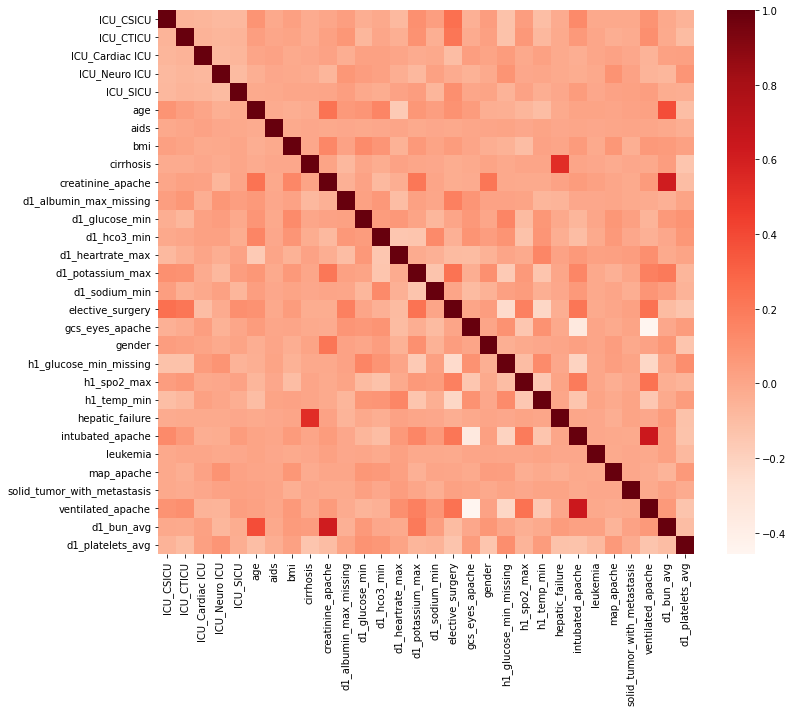

In [286]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)
# sns.heatmap(corr, annot=False, cmap='RdYlGn')
plt.show()

In [107]:
X_4.to_csv(r"..\cmp 7023\SELECTED FEATURES.csv".replace("\\","/"),index=False)

In [709]:
X_4['diabetes_mellitus']=y_3

In [4]:
X_4=pd.read_csv("SELECTED FEATURES.csv".replace("\\","/"))

# 2. Classification

In [10]:
from sklearn.decomposition import PCA


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_4, y_3, test_size=0.33,stratify=y_3,random_state=1)
X_train,X_val, y_train, y_val= train_test_split (X_train,y_train, test_size=0.3,random_state=1,stratify=y_train)

In [11]:
y_train.value_counts()

0.0    23910
1.0    13201
Name: diabetes_mellitus, dtype: int64

In [12]:
from sklearn.utils import resample

#The first thing is contatenate our training data back together.  
resampling = X_train.copy()
resampling['diabetes_mellitus']= y_train.values

# separate minority and majority classes
majority_class = resampling[resampling['diabetes_mellitus']==0]
minority_class = resampling[resampling['diabetes_mellitus']==1]

# Upsample minority class
minority_upsampled = resample(minority_class, 
                                 replace=True,     # sample with replacement
                                 n_samples=23910,     # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
upsampled = pd.concat([majority_class, minority_upsampled])

# Show dataset statistics
print(upsampled.describe())
 
# Display new class counts
upsampled.diabetes_mellitus.value_counts()

          ICU_CSICU  ICU_Neuro ICU           age           bmi  \
count  47820.000000   47820.000000  47820.000000  47820.000000   
mean       0.042367       0.072731     63.360694     29.025053   
std        0.201428       0.259697     15.396389      6.617999   
min        0.000000       0.000000     20.000000     14.844926   
25%        0.000000       0.000000     54.000000     24.264172   
50%        0.000000       0.000000     65.000000     28.277551   
75%        0.000000       0.000000     75.000000     33.032372   
max        1.000000       1.000000     89.000000     45.577024   

       d1_albumin_avg  d1_bilirubin_avg    d1_bun_avg  d1_glucose_min  \
count    47820.000000      47820.000000  47820.000000    47820.000000   
mean         2.961445          0.653753     21.471840      110.736867   
std          0.523524          0.254398     10.374886       29.097180   
min          1.150000          0.200000      3.500000       33.000000   
25%          2.650000          0.480000 

0.0    23910
1.0    23910
Name: diabetes_mellitus, dtype: int64

In [13]:
X_5=upsampled.copy()
X_5.columns

Index(['ICU_CSICU', 'ICU_Neuro ICU', 'age', 'bmi', 'd1_albumin_avg',
       'd1_bilirubin_avg', 'd1_bun_avg', 'd1_glucose_min', 'd1_potassium_avg',
       'd1_sodium_avg', 'd1_sodium_missing', 'h1_glucose_avg',
       'h1_glucose_missing', 'diabetes_mellitus'],
      dtype='object')

In [14]:
X_train=X_5[['ICU_CSICU', 'ICU_Neuro ICU', 'age', 'bmi', 'd1_albumin_avg',
       'd1_bilirubin_avg', 'd1_bun_avg', 'd1_glucose_min', 'd1_potassium_avg',
       'd1_sodium_avg', 'd1_sodium_missing', 'h1_glucose_avg',
       'h1_glucose_missing']]
y_train=X_5['diabetes_mellitus']

In [69]:
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler, Normalizer, PowerTransformer, QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_validate, ParameterGrid,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,  f1_score, classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA


### SVC

In [115]:
# process = [("transformer", PowerTransformer()), ("clf", SVC)]
# clf_cv = RandomizedSearchCV(Pipeline(process), params)
y_hat = clf_cv.predict(X_test)
#calculate the score - accuracy / error or other metrics.
from sklearn.metrics import accuracy_score, precision_score, recall_score,  f1_score
accuracy = accuracy_score(y_test, y_hat)
print(accuracy)

0.7400911423428943


In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor 

clf=RandomForestClassifier()
# Fit train data and predict test data
clf.fit(X=X_train, y= y_train)
clf_preds = clf.predict(X_val)

# Print results
print(classification_report(y_val, clf_preds))

# Making the Confusion Matrix
cm = confusion_matrix(y_val, clf_preds)

# Plot it
plot_confusion_matrix(clf, X_val, y_val)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [30]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score,  f1_score

pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', RandomForestRegressor()) #step2 - classifier
])
pipeline.steps

scores = cross_validate(pipeline, X_train, y_train,scoring='recall')
scores

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 1771, in recall_score
    _, r, _, _ = precision_recall_fscore_support(y_true, y_pred,
  File "C:\Anaconda\lib\site-packa

{'fit_time': array([15.66583705, 16.50343037, 16.07867479, 16.80586219, 16.33775687]),
 'score_time': array([0.18008304, 0.14361978, 0.15262914, 0.16057181, 0.21243382]),
 'test_score': array([nan, nan, nan, nan, nan])}

In [121]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(MLPClassifier())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())

for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

---------------------------------
LogisticRegression()
-----------------------------------
fit_time  mean  0.023636245727539064
fit_time  std  0.006650641248714419
score_time  mean  0.0006002426147460937
score_time  std  0.0012004852294921877
test_score  mean  0.730280217482225
test_score  std  0.004171147689605704
---------------------------------
SVC()
-----------------------------------
fit_time  mean  34.46773943901062
fit_time  std  0.38713131279280805
score_time  mean  12.7489248752594
score_time  std  0.053297891669446935
test_score  mean  0.7580719364282726
test_score  std  0.004314819732044017


C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


---------------------------------
MLPClassifier()
-----------------------------------
fit_time  mean  18.190357303619386
fit_time  std  2.4927874143374464
score_time  mean  0.007858562469482421
score_time  std  0.008034213538309812
test_score  mean  0.7600376411543287
test_score  std  0.005630661655305833
---------------------------------
KNeighborsClassifier(n_neighbors=3)
-----------------------------------
fit_time  mean  0.06908469200134278
fit_time  std  0.007716649955113728
score_time  mean  2.146127128601074
score_time  std  0.018507490665100965
test_score  mean  0.7518193224592221
test_score  std  0.0050973227588158344
---------------------------------
DecisionTreeClassifier()
-----------------------------------
fit_time  mean  2.5479662895202635
fit_time  std  0.04838370441948628
score_time  mean  0.006728219985961914
score_time  std  0.00827491633723514
test_score  mean  0.821685487243831
test_score  std  0.0029415039139302356
---------------------------------
RandomForestCla

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [78]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif,f_classif
from sklearn.preprocessing import MinMaxScaler, Normalizer, PowerTransformer, QuantileTransformer, StandardScaler
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

process = [("clf", RandomForestClassifier())]

# Build the parameter grid

# slt_params = [
#     (SelectKBest, {"score_func": [f_classif,mutual_info_classif], "k": [k for k in range(10,14)]}),
#     (PCA, {"n_components": [5,10]})
# ]

# slts = [ctor(**para) for ctor, paras in slt_params for para in ParameterGrid(paras)]
     
clf_params = [
    (RandomForestClassifier, {'max_depth': [60,100,120],
                             'min_samples_split': [4,5,6],
                             'n_estimators': [500],
                             }),
]
            
clfs = [ctor(**para) for ctor, paras in clf_params for para in ParameterGrid(paras)]

# trans = [Normalizer()]

params = dict(
#     normalizer = trans,
#     selector = slts,
    clf = clfs
)

# Use our pipeline and the parameter grid with RandomizedSearchCV
clf = RandomizedSearchCV(Pipeline(process), param_distributions=params,
                          n_jobs=-1, scoring = 'recall')
clf.fit(X_train, y_train);

# Show the best parameters
print(clf.best_params_)

# Collect predictions on validation data
y_hat = clf.predict(X_val)

# Print classification report
print(classification_report(y_val, y_hat))

C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'clf': RandomForestClassifier(max_depth=100, min_samples_split=5, n_estimators=500)}
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81     10248
         1.0       0.67      0.61      0.64      5657

    accuracy                           0.75     15905
   macro avg       0.73      0.72      0.73     15905
weighted avg       0.75      0.75      0.75     15905



In [79]:
print(clf.best_params_)
print(classification_report(y_val, y_hat))

{'clf': RandomForestClassifier(max_depth=100, min_samples_split=5, n_estimators=500)}
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81     10248
         1.0       0.67      0.61      0.64      5657

    accuracy                           0.75     15905
   macro avg       0.73      0.72      0.73     15905
weighted avg       0.75      0.75      0.75     15905



Pipeline(steps=[('normalizer', Normalizer()),
                ('clf',
                 RandomForestClassifier(max_depth=100, min_samples_split=5,
                                        n_estimators=500))])
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81     16824
         1.0       0.66      0.61      0.64      9289

    accuracy                           0.75     26113
   macro avg       0.73      0.72      0.72     26113
weighted avg       0.75      0.75      0.75     26113



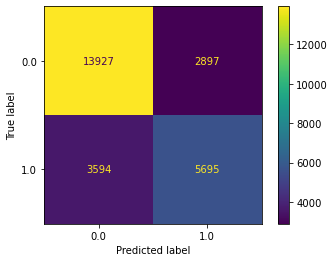

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay

estimators = [('normalizer',Normalizer()),
    ('clf', RandomForestClassifier(max_depth=100, 
                                 min_samples_split=5, 
                                 n_estimators=500))]

pipe = Pipeline(estimators)
print(pipe)
# print(y_train)

#we can use a pipeline like a classifier or transformer.
pipe.fit(X_train, y_train)
y_preds = pipe.predict(X_test)
print(classification_report(y_test, y_preds))
cm=confusion_matrix(y_test,y_preds,labels=pipe.classes_)
ConfusionMatrixDisplay(cm, display_labels=pipe.classes_).plot()
plt.show()

In [45]:
y_preds = pipe.predict(X_val)

print(classification_report(y_val, y_preds))

              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81     10248
         1.0       0.67      0.62      0.64      5657

    accuracy                           0.75     15905
   macro avg       0.73      0.72      0.73     15905
weighted avg       0.75      0.75      0.75     15905



#rfc = RandomForestClassifier(random_state=1, max_iter=300)

clf_params = [(RandomForestClassifier, {'bootstrap': [True, False],
     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],
     'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]})
             ]
            
clfs = [ctor(**para) for ctor, paras in clf_params for para in ParameterGrid(paras)]

params = dict(transformer= ["passthrough", StandardScaler(), MinMaxScaler(), Normalizer(), PowerTransformer(), QuantileTransformer()],
            clf = clfs)
process = [("transformer", StandardScaler()), ("clf", RandomForestClassifier)]

clf_cv = RandomizedSearchCV(Pipeline(process), params)

clf_cv.fit(X_train, y_train)
score = clf_cv.score(X_val, y_val)
print(score)
print(clf_cv.best_params_)

#make a dictionary with the parameter we want to set, and the range of values we want to cross-validate over
#in this example I am going to set hidden layers sizes, activation function, solver, alpha and learning rate.

parameters = {
    'bootstrap': [True, False],
     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],
     'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}
#the parameter n_jobs is to define how many CPU cores from your computer to use (-1 is for all the cores available).
#The cv is the number of splits for cross-validation.
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
clf.fit(X_train, y_train)

#here we can see the best parameter was for the MLP
print("Best parameters found:",clf.best_params_)


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
print(classification_report(y_true, y_pred))
y_true, y_pred = y_test , clf.predict(X_test)
print (y_pred)
cm = confusion_matrix(y_test, y_pred)
#we can plot it
plot_confusion_matrix(clf,X_test, y_test)

In [311]:
#setup your nearest classifier. 
from sklearn.neighbors import KNeighborsClassifier

#Here i create a 2NN classifier
kNN = KNeighborsClassifier(n_neighbors=13)

from sklearn.model_selection import GridSearchCV

#make a dictionary with the parameter we want to set, and the range of values we want to cross-validate over
#in this example I am going to set the k parameter in kNN, where I am testing between 1 to 10
#and others as below
parameters = {
    "n_neighbors" : [1,2,3,4,5,6,7,8,9,10],
    "weights": ['uniform','distance'],
    "algorithm": ['ball_tree','kd_tree','brute'],
    "p":[1,2]
}

clf = GridSearchCV(kNN,param_grid=parameters)
clf.fit(X_train, y_train)

#here we can see the best parameter was for n_neighbors
print(clf.best_params_)

y_hat = clf.predict(X_val)
# Print classification report
print(classification_report(y_val, y_hat))

{'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Best parameter Accuracy: 0.63


In [25]:
mlp = MLPClassifier(random_state=1)

#make a dictionary with the parameter we want to set, and the range of values we want to cross-validate over
#in this example I am going to set hidden layers sizes, activation function, solver, alpha and learning rate.
parameters = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
#the parameter n_jobs is to define how many CPU cores from your computer to use (-1 is for all the cores available).
#The cv is the number of splits for cross-validation.
clf = RandomizedSearchCV(mlp,param_distributions=parameters,n_jobs=-1, cv=3,scoring='recall')
clf.fit(X_train, y_train)
#here we can see the best parameter was for the MLP
print("Best parameters found:",clf.best_params_)

y_hat = clf.predict(X_val)
# Print classification report
print(classification_report(y_val, y_hat))


Best parameters found: {'solver': 'sgd', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.0001, 'activation': 'relu'}
              precision    recall  f1-score   support

         0.0       0.85      0.70      0.77     10248
         1.0       0.59      0.79      0.67      5657

    accuracy                           0.73     15905
   macro avg       0.72      0.74      0.72     15905
weighted avg       0.76      0.73      0.73     15905



C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
estimators = [('clf', MLPClassifier(random_state=1,solver='sgd', learning_rate='adaptive',
                                   hidden_layer_sizes =(50,50,50),alpha=0.0001,activation='relu'))]

pipe = Pipeline(estimators)
print(pipe)
# print(y_train)

#we can use a pipeline like a classifier or transformer.
pipe.fit(X_train, y_train)

y_preds = pipe.predict(X_test)

print(classification_report(y_test, y_preds))

Pipeline(steps=[('clf',
                 MLPClassifier(hidden_layer_sizes=(50, 50, 50),
                               learning_rate='adaptive', random_state=1,
                               solver='sgd'))])
              precision    recall  f1-score   support

         0.0       0.86      0.70      0.77     16824
         1.0       0.60      0.79      0.68      9289

    accuracy                           0.73     26113
   macro avg       0.73      0.75      0.73     26113
weighted avg       0.77      0.73      0.74     26113



C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [313]:
y_true, y_pred = y_test , clf.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      5347
           1       0.38      0.35      0.36      2316

    accuracy                           0.63      7663
   macro avg       0.55      0.55      0.55      7663
weighted avg       0.62      0.63      0.63      7663



In [49]:
from sklearn.svm import SVC 
# defining parameter range 
parameters = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
clf = GridSearchCV(SVC(), parameters, refit = True) 
  
# fitting the model for grid search 
clf.fit(X_train, y_train) 


#here we can see the best parameter was for n_neighbors
print("Best parameters found:",clf.best_params_)

y_true, y_pred = y_test , clf.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

print (y_pred)
cm = confusion_matrix(y_test, y_pred)

#we can plot it

plot_confusion_matrix(clf,X_test, y_test)


KeyboardInterrupt: 

C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



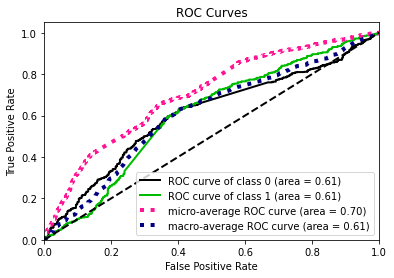

In [763]:
import scikitplot as skplt
from sklearn.metrics import plot_roc_curve

clf=SVC(C= 1, gamma= 0.1, kernel= 'rbf',probability=True)
# fitting the model 
clf.fit(X_train, y_train) 
y_true, y_pred = y_test , clf.predict(X_test)
y_probas = clf.predict_proba(X_test)
#print (y_probas)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()


# Clustering

In [98]:
labels_true = y_train
labels_true

67720    0.0
58104    0.0
42313    0.0
33671    0.0
73480    0.0
61468    0.0
79091    0.0
32601    0.0
72039    0.0
74556    0.0
32975    0.0
42716    0.0
50739    0.0
61653    0.0
76355    0.0
76761    0.0
33716    0.0
45306    0.0
38951    0.0
60892    0.0
46219    0.0
66833    0.0
52211    0.0
29570    0.0
46055    0.0
        ... 
15740    1.0
383      1.0
19106    1.0
5783     1.0
14377    1.0
17415    1.0
3915     1.0
20788    1.0
4038     1.0
12170    1.0
5338     1.0
20116    1.0
9088     1.0
17931    1.0
14047    1.0
1052     1.0
1345     1.0
19488    1.0
20157    1.0
14212    1.0
15205    1.0
15502    1.0
8159     1.0
545      1.0
21789    1.0
Name: diabetes_mellitus, Length: 47820, dtype: float64

In [84]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=23)
kmeans.fit(X_train)

print('Silhoutte score of our model is ' + str(silhouette_score(X_train, kmeans.labels_)))


Silhoutte score of our model is 0.39774936620751383


In [85]:
X_train2=X_train.copy()

In [92]:
cols=list(X_train.columns)
cols

['ICU_CSICU',
 'ICU_Neuro ICU',
 'age',
 'bmi',
 'd1_albumin_avg',
 'd1_bilirubin_avg',
 'd1_bun_avg',
 'd1_glucose_min',
 'd1_potassium_avg',
 'd1_sodium_avg',
 'd1_sodium_missing',
 'h1_glucose_avg',
 'h1_glucose_missing']

In [89]:
X_train2['cluster_id'] = kmeans.labels_
for col in cols:
    X_train2[col] = np.exp(X_train2[col])

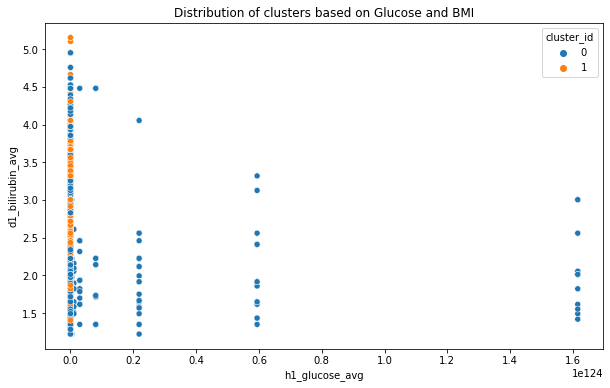

In [94]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=X_train2, x='h1_glucose_avg', y='d1_bilirubin_avg', hue='cluster_id')
plt.title('Distribution of clusters based on Glucose and BMI')
plt.show()

In [95]:
from sklearn.cluster import FeatureAgglomeration
#we have 3 features in the Iris dataset. but we suspect that perhaps we can agglomerate them into 2 features.
agglo = FeatureAgglomeration(n_clusters = 2,linkage="average")
agglo.fit(X_train2)

X_reduced = agglo.transform(X_train2)

k_means = KMeans(2)
k_means.fit(X_reduced)

labels_pred = k_means.predict(X_reduced)
# print(labels_pred)

In [100]:
k_means = KMeans(2)
k_means.fit(X_train)
labels_pred = k_means.predict(X_train)

In [103]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score

score2 = adjusted_mutual_info_score(labels_true, labels_pred)
score_reduced = adjusted_rand_score(labels_true, labels_pred)
print("Full features score", score2)
print("Reduced Features score: ", score_reduced)

Full features score 0.0739314005660299
Reduced Features score:  0.0981382924675509


In [104]:
import scipy.cluster.hierarchy as sch